<a href="https://colab.research.google.com/github/z1qsx/Data-Science-analysis-Approaches/blob/master/Data_Science_Research_of_The_PAMAP2_Physical_Activity_Monitoring_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science Research of The PAMAP2 Physical Activity Monitoring Dataset

## Overview

### Background:

The PAMAP2 Physical Activity Monitoring dataset, contains data of 18 different physical activities (such as walking, cycling, playing soccer etc) performed by 9 subjects wearing 3 inertial measurement units (IMU) and a heart rate monitor. 

### Source:

This data was stored in individual text files per subject. Each row in each file represents one reading and contains 54 attributes (including timestamp, activity ID, heart rate and IMU sensory data). 

### Target of the report
Assuming the goal is to develop hardware and/or software which can determine the amount and type of physical activity carried out by an individual, what actionable insights can you derive from the dataset?

### Specific Requirements

1. Carry out thorough exploratory data analysis and appropriately handle missing or dirty data

2. develop and test at least one hypothesis for a relationship between a single pair of attributes;

3. develop and test at least one model which uses multiple attributes to make predictions.

*NB:*  
C– 1 temperature (°C)  
ACC16– 2-4 3D-acceleration data (ms-2),  scale: ±16g  
ACC– 5-7 3D-acceleration data (ms-2),  scale: ±6g  
G– 8-10 3D-gyroscope data (rad/s)  
M– 11-13 3D-magnetometer data (μT)   
O– 14-17 orientation (invalid in this data collection)  

## 1. Introduction

This report contains a selection of seven parts. The PAMAP2 physical activity monitoring dataset
will be analysed for the goal. the goal is to develop hardware and/or software which can determine the amount and type of physical activity carried out by an individual. Therefore, the data need to be munging and cleaning before exploratory data analysis.  Moreover,  I consider the goal which is to develop hardware for physical activity. Now, fitness tracker is most common in our daily life physical activity. Therefore, I would mainly research and analyse the data of hand.  

For part one, I will read and analyse the data of description of activities and performed activities summary to primarily find out the effect about different subjects' data.
In part two, data collection, munging and cleaning, it is important for after analysis of data. So that, we need handling missing values, data normalization and cleaning and parsing time for the data.

After handling missing values and normalization,  data will be research for exploratory data analysis of the relationship of hand temperature and other variables. Moreover,  I will predict the temperature with modelling the linear regression.

For part four, similarly, the data of types of physical activity and other variables are analysed. furthermore, after I analyse the correlation of the data. I will build the model that categorization model predict and categorize types of physical activity. Moreover, the classifier will be tested and predict new data on other subjects. 

Finally, for the amount of physical activities, I will computer buring calorie(kcal) to determine the values for the prediction system. Moreover, this report will summary the above results and build the model to predict physical activities.


Data collection  
Data cleaning  
Exploratory data analysis

  correlation of temperature and  otehr IMU data  
  
  hypothesis testing  
  
  Modelling machine learning linear Regression   
  
  Generative model
  Training data 
  Model testing
  
  correlation of heart rate and  otehr IMU data
  
  correlation of activities and otehr data
  
  Classifier 
  
visualsiation, Presentations decisions

Modelling Machine learning and hypothesis testing

Data product building

## 2. reading data 

In [0]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from numpy import corrcoef,array
import statsmodels.api as sm 
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import sklearn.model_selection as cross_validation

### google diver contect

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



### 2.1 reading data of description of activities and performed activities summary

#### Reading data of subject information 

In [0]:
train_downloaded = drive.CreateFile({'id': '12JkbC8q7lSaZR42yJd2DPI_fjjoHHnuX'})
train_downloaded.GetContentFile('subjectInformation.csv')

In [0]:
# reading all column
def read_csv_m(n):
    df = pd.read_csv("subjectInformation.csv")
    return df
si_data=read_csv_m(0)
si_data.shape#data size

(9, 8)

In [0]:
print(si_data.mean())
si_data

Subject ID         105.000000
Age(years)          27.222222
Height(cm)         179.444444
Weight(kg)          80.888889
Resting HR(bpm)     65.000000
Max HR (bpm)       192.777778
dtype: float64


,Subject ID,Sex,Age(years),Height(cm),Weight(kg),Resting HR(bpm),Max HR (bpm),Dominant hand
0,101,Male,27,182,83,75,193,right
1,102,Female,25,169,78,74,195,right
2,103,Male,31,187,92,68,189,right
3,104,Male,24,194,95,58,196,right
4,105,Male,26,180,73,70,194,right
5,106,Male,26,183,69,60,194,right
6,107,Male,23,173,86,60,197,right
7,108,Male,32,179,87,66,188,left
8,109,Male,31,168,65,54,189,right


According to the above table, there were information  of 1 female, 8 males. Number of males was obvious greater than female.  Therefore, what samples of male are analysed is more accurate.  Moreover, their aged and BMI were $27.22±3.31 years$ and $25.1125.11±2.62kgm^2$ respectively.  Furthermore, only one subject 's dominant hand is left. So that, for the following research, I will mainly analyse data of right hand for accuracy.

### Reading data of performed activities summary 

In [0]:
train_downloaded = drive.CreateFile({'id': '1v4B7laoFmrpdft7k6sQMvhONhWRwMLIG'})
train_downloaded.GetContentFile('PerformedActivitiesSummary.csv')

In [0]:
def read_csv_m(n):
    df = pd.read_csv("PerformedActivitiesSummary.csv")
    return df
pas_data=read_csv_m(0)
pas_data.shape#data size
print('standard deviation of each subject:',pas_data[1:9].std())
pas_data

standard deviation of each subject: subject101        241.735564
subject102        130.956631
subject103        137.572941
subject104        139.546724
subject105        169.335960
subject106        135.894396
subject107        135.894396
subject108        193.635765
subject109        242.357314
Sum               724.047745
Nr.of subjects      2.474874
dtype: float64


,Activities,subject101,subject102,subject103,subject104,subject105,subject106,subject107,subject108,subject109,Sum,Nr.of subjects
0,lying,271.86,234.29,220.43,230.46,233.39,256.10,256.10,241.64,0.00,1925.15,8.0
1,sitting,234.79,223.44,287.60,254.91,230.40,122.81,122.81,229.22,0.00,1851.80,8.0
2,standing,217.16,255.75,205.32,247.05,243.55,257.50,257.50,251.59,0.00,1899.23,8.0
3,walking,222.52,325.32,290.35,319.31,257.20,337.19,337.19,315.32,0.00,2387.53,8.0
4,running,212.64,92.37,0.00,0.00,228.24,36.91,36.91,165.31,0.00,981.92,6.0
5,cycling,235.74,251.07,0.00,226.98,204.85,226.79,226.79,254.74,0.00,1645.93,7.0
6,Nordic walking,202.64,297.38,0.00,275.32,266.85,287.24,287.24,288.87,0.00,1881.00,7.0
7,watching TV,836.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,836.45,1.0
8,computer work,0.00,0.00,0.00,0.00,617.76,0.00,0.00,687.24,685.49,3099.31,4.0
9,car driving,545.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,545.18,1.0


From the above table, it shows that types of activities of subject101 and subject 108 were greater than orthers. If their data are analysed, the results will be more accurate. Therefore, they will be gathered for further analysis in my report. Particularly,  It is remarkable that standard deviation of subject 108 smaller than subject 101. So that, data of subject 08 will be my first analysis subject. 

###2.2 Data collection

Data of subject 01 and subject 08 will be collection for analysis

In [0]:
train_downloaded = drive.CreateFile({'id': '1Xqys0Bsb6F_U9wfctjZ64aU1kOi1uQBH'})
train_downloaded.GetContentFile('subject101.dat')

In [0]:
train_downloaded = drive.CreateFile({'id': '1sxVF8gy0XKpWUtXLxQshwToSdSHkvDwU'})
train_downloaded.GetContentFile('subject108.dat')

In [0]:
# reading all column
def read_csv_m1(names_data):
    df = pd.read_table(names_data,index_col=False,delim_whitespace=True)
    return df


In [0]:
subeject08_data=read_csv_m1("subject108.dat")
print('Data of subject 08:',subeject08_data.shape)#data size

Data of subject 08: (408030, 54)


For the data of subject 08,  the data-files contains 408030 row and 54 columns per row.

In [0]:
subeject01_data=read_csv_m1("subject101.dat")
print('Data of subject 01:',subeject01_data.shape)#data size

Data of subject 01: (376416, 54)


For the data of subject 01,  the data-files contains 376416 row and 54 columns per row.

According to the above results, data size of subject 08 was greater than subject 01. Therefore, I will mainly analyse data of subject 08.

In [0]:
copy_simple01=subeject01_data
copy_simple08=subeject08_data

### 2.3 Data munging

In [0]:
copy_simple.columns=['timestamp','activityID','heart rate',
                            'IMU hand1','IMU hand2','IMU hand3','IMU hand4','IMU hand5','IMU hand6','IMU hand7','IMU hand8',
                            'IMU hand9','IMU hand10','IMU hand11','IMU hand12','IMU hand13','IMU hand14','IMU hand15','IMU hand16','IMU hand17'
                            ,'IMU chest1','IMU chest2','IMU chest3','IMU chest4','IMU chest5','IMU chest6','IMU chest7','IMU chest8',
                            'IMU chest9','IMU chest10','IMU chest11','IMU chest12','IMU chest13','IMU chest14','IMU chest15','IMU chest16','IMU chest17'
                            ,'IMU ankle1','IMU ankle2','IMU ankle3','IMU ankle4','IMU ankle5','IMU ankle6','IMU ankle7','IMU ankle8'
                            ,'IMU ankle9','IMU ankle10','IMU ankle11','IMU ankle12','IMU ankle13','IMU ankle14','IMU ankle15','IMU ankle16','IMU ankle17']
copy_simple=copy_simple.drop(['IMU hand14','IMU hand15','IMU hand16','IMU hand17'], axis=1)


copy_simple=copy_simple.drop(['IMU chest14','IMU chest15','IMU chest16','IMU chest17'], axis=1)
copy_simple=copy_simple.drop(['IMU ankle14','IMU ankle15','IMU ankle16','IMU ankle17'], axis=1)

copy_simple.columns=['timestamp','activityID','heart_rate',
                            'IMU_hand1_C','IMU_hand2_ACC16','IMU_hand3_ACC16','IMU_hand4_AAC16','IMU_hand5_ACC6','IMU_hand6_ACC6','IMU_hand7_ACC6','IMU_hand8_G',
                            'IMU_hand9_G','IMU_hand10_G','IMU_hand11_M','IMU_hand12_M','IMU_hand13_M'
                            ,'IMU_chest1_C','IMU_chest2_ACC16','IMU_chest3_ACC16','IMU_chest4_ACC16','IMU_chest5_ACC6','IMU_chest6_ACC6','IMU_chest7_ACC6','IMU_chest8_G',
                            'IMU_chest9_G','IMU_chest10_G','IMU_chest11_M','IMU_chest12_M','IMU_chest13_M'
                            ,'IMU_ankle1_C','IMU_ankle2_ACC16','IMU_ankle3_ACC16','IMU_ankle4_ACC16','IMU_ankle5_ACC6','IMU ankle6_ACC6','IMU_ankle7_ACC6','IMU_ankle8_G'
                            ,'IMU_ankle9_G','IMU_ankle10_G','IMU_ankle11_M','IMU_ankle12_M','IMU_ankle13_M']


In [0]:
def data_ma(name_datas):
#   name_datas.columns=['timestamp','activityID','heart rate',
#                               'IMU hand1','IMU hand2','IMU hand3','IMU hand4','IMU hand5','IMU hand6','IMU hand7','IMU hand8',
#                               'IMU hand9','IMU hand10','IMU hand11','IMU hand12','IMU hand13','IMU hand14','IMU hand15','IMU hand16','IMU hand17'
#                               ,'IMU chest1','IMU chest2','IMU chest3','IMU chest4','IMU chest5','IMU chest6','IMU chest7','IMU chest8',
#                               'IMU chest9','IMU chest10','IMU chest11','IMU chest12','IMU chest13','IMU chest14','IMU chest15','IMU chest16','IMU chest17'
#                               ,'IMU ankle1','IMU ankle2','IMU ankle3','IMU ankle4','IMU ankle5','IMU ankle6','IMU ankle7','IMU ankle8'
#                               ,'IMU ankle9','IMU ankle10','IMU ankle11','IMU ankle12','IMU ankle13','IMU ankle14','IMU ankle15','IMU ankle16','IMU ankle17']
  


  name_datas.columns=['timestamp','activityID','heart_rate',
                              'IMU_hand1_C','IMU_hand2_ACC16','IMU_hand3_ACC16','IMU_hand4_ACC16','IMU_hand5_ACC6','IMU_hand6_ACC6','IMU_hand7_ACC6','IMU_hand8_G',
                              'IMU_hand9_G','IMU_hand10_G','IMU_hand11_M','IMU_hand12_M','IMU_hand13_M','IMU hand14','IMU hand15','IMU hand16','IMU hand17'
                              ,'IMU_chest1_C','IMU_chest2_ACC16','IMU_chest3_ACC16','IMU_chest4_ACC16','IMU_chest5_ACC6','IMU_chest6_ACC6','IMU_chest7_ACC6','IMU_chest8_G',
                              'IMU_chest9_G','IMU_chest10_G','IMU_chest11_M','IMU_chest12_M','IMU_chest13_M','IMU chest14','IMU chest15','IMU chest16','IMU chest17'
                              ,'IMU_ankle1_C','IMU_ankle2_ACC16','IMU_ankle3_ACC16','IMU_ankle4_ACC16','IMU_ankle5_ACC6','IMU ankle6_ACC6','IMU_ankle7_ACC6','IMU_ankle8_G'
                              ,'IMU_ankle9_G','IMU_ankle10_G','IMU_ankle11_M','IMU_ankle12_M','IMU_ankle13_M','IMU ankle14','IMU ankle15','IMU ankle16','IMU ankle17']
  
  name_datas=name_datas.drop(['IMU hand14','IMU hand15','IMU hand16','IMU hand17'], axis=1)
  name_datas=name_datas.drop(['IMU chest14','IMU chest15','IMU chest16','IMU chest17'], axis=1)
  name_datas=name_datas.drop(['IMU ankle14','IMU ankle15','IMU ankle16','IMU ankle17'], axis=1)
  

 

In [0]:
dicts={}
dicts={0:'other',1:'lying',2:'sitting',3:'standing',4:'walking',5:'running',
       6:'cycling',7:'Nordic walking',9:'watching TV',10:'computer work' 
       ,11:'car driving',12:'ascending stairs',13:'descending stairs', 
       16:'vacuum cleaning',17:'ironing',18:'folding laundry', 
       19:'house cleaning',20:'playing soccer',24:'rope jumping' }

In [0]:
# data_ma(copy_simple01)
# copy_simple01.activityID=copy_simple01.activityID.apply(lambda x:dicts[x])

In [0]:
data_ma(copy_simple08)
copy_simple08.activityID=copy_simple08.activityID.apply(lambda x:dicts[x])

In [0]:
copy_simple08=copy_simple08.drop(['IMU hand14','IMU hand15','IMU hand16','IMU hand17'], axis=1)
copy_simple08=copy_simple08.drop(['IMU chest14','IMU chest15','IMU chest16','IMU chest17'], axis=1)
copy_simple08=copy_simple08.drop(['IMU ankle14','IMU ankle15','IMU ankle16','IMU ankle17'], axis=1)

In [0]:
copy_simple08.head()

,timestamp,activityID,heart_rate,IMU_hand1_C,IMU_hand2_ACC16,IMU_hand3_ACC16,IMU_hand4_ACC16,IMU_hand5_ACC6,IMU_hand6_ACC6,IMU_hand7_ACC6,...,IMU_ankle4_ACC16,IMU_ankle5_ACC6,IMU ankle6_ACC6,IMU_ankle7_ACC6,IMU_ankle8_G,IMU_ankle9_G,IMU_ankle10_G,IMU_ankle11_M,IMU_ankle12_M,IMU_ankle13_M
0,5.90,other,NaN,33.3125,-9.91204,-1.41822,0.974050,-9.78262,-1.60285,1.29085,...,-2.77267,9.56080,-0.076888,-2.43337,0.004436,-0.005926,-0.006704,-35.4508,38.2543,-17.7663
1,5.91,other,NaN,33.3125,-9.87531,-1.57027,0.975113,-9.78237,-1.57265,1.29079,...,-2.65762,9.57594,-0.091972,-2.40313,0.022508,-0.002265,0.014646,-35.6984,38.2688,-17.0580
2,5.92,other,NaN,33.3125,-9.72175,-1.60870,1.054520,-9.70677,-1.60334,1.35118,...,-2.77150,9.62108,-0.076819,-2.38829,-0.006964,0.035314,0.010983,-34.9492,38.7447,-17.6233
3,5.93,other,NaN,33.3125,-9.79920,-1.49497,0.975999,-9.58657,-1.57408,1.27549,...,-2.61786,9.62158,-0.091796,-2.26716,-0.015835,-0.001065,-0.000410,-35.2105,38.8857,-17.9080
4,5.94,other,NaN,33.3125,-9.49956,-1.49798,0.903523,-9.51084,-1.54441,1.29045,...,-2.77281,9.56130,-0.106989,-2.31219,-0.015407,0.064069,0.012018,-34.9426,38.3577,-17.7646


For data munging, the data columns labels and activitiy ID were replaced with detial string label. The reason is that if only figure was was still difficult to read and understand, the letter was easier to read and understand. Moreover, according to the readme file, data of orientation were invalid in this data collection. Therefore, these data need to drop.

#### Average

In [0]:
def mean_cal(name):
    copy_simple1['mean_acc16_'+name]=(copy_simple1['IMU_'+name+'2_ACC16'].astype(float)+copy_simple1['IMU_'+name+'3_ACC16'].astype(float)
                                     +copy_simple1['IMU_'+name+'4_ACC16'].astype(float))/3
    copy_simple1['mean_acc6_'+name]=(copy_simple1['IMU_'+name+'5_ACC6'].astype(float)+copy_simple1['IMU_'+name+'6_ACC6'].astype(float)
                                    +copy_simple1['IMU_'+name+'7_ACC6'].astype(float))/3
    copy_simple1['mean_g_'+name]=(copy_simple1['IMU_'+name+'8_G'].astype(float)+copy_simple1['IMU_'+name+'9_G'].astype(float)
                                   +copy_simple1['IMU_'+name+'10_G'].astype(float))/3
    copy_simple1['mean_m_'+name]=(copy_simple1['IMU_'+name+'11_M'].astype(float)+copy_simple1['IMU_'+name+'12_M'].astype(float)
                                   +copy_simple1['IMU_'+name+'13_M'].astype(float))/3

### 2.4 Data  cleaning

Handling missing values
Data scaling and normalization
Cleaning and parsing dates

In [0]:
# copy_simple08.info()

Figure out why the data is missing

In [0]:
total_cells-total_missing

37179

In [0]:
total_cells = np.product(copy_simple08['heart_rate'].shape)
total_missing = copy_simple08['heart_rate'].isnull().sum()


print('Missing values size of heart rate:',((1-(total_cells-total_missing)/total_cells)),'%')

Missing values size of heart rate: 0.9088816998750092 %


According to the above list, the missing values of heart rate not only was the greastest, but also it was only 37179 data and missing data $90.88\%$. The reason may be that data acquisition failures may cause data missing, for example, when the real-time requirement of the system is high, the machine has no time to judge and make decisions, resulting in the missing values of data. However, the data of heart rate was important for classification of activity types and other reseach. If a large number of other attribute values are abandoned due to the missing of one attribute value, this deletion is a great waste of information, so the missing values are interpolated with possible values. Therefore,  we need filling in missing values rather than droping the data.

#### Handling missing values of data of head rate

Take a first look at the data

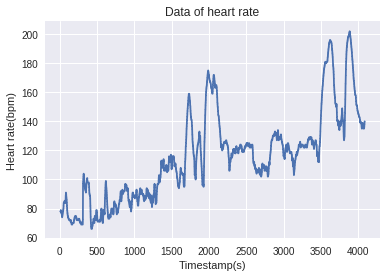

In [0]:
plt.title('Data of heart rate')
plt.xlabel('Timestamp(s)')
plt.ylabel('Heart rate(bpm)')
read_data=copy_simple08.dropna(axis=0,how='any')
read_data=read_data.drop(['activityID'],axis=1).astype(float).dropna(axis=0,how='any')
plt.plot(read_data['timestamp'].values.astype(float),read_data['heart_rate'].values.astype(float))

According to the chart of data of heart rate, it show that its values of heart rate was not change much for a period.Moreover, from the reading data, the subject was a type of activity for a period. Therefore, firstly, I would compute heart rate average of each activity. Secondly,  the average of activity will be filled in missing data by the average of each activity.

In [0]:
def fill_mis(datex):
  act_name=list(set(datex['activityID'].values))
  datedd=datex
  for act in act_name:
    mean_num = np.mean(datex[datex['activityID']== act]['heart_rate'])
    datedd.loc[datedd['activityID']== act, ['heart_rate']]=datedd.loc[datedd['activityID']== act, ['heart_rate']].fillna(mean_num)
  return datedd

In [0]:
simple08=fill_mis(copy_simple08)

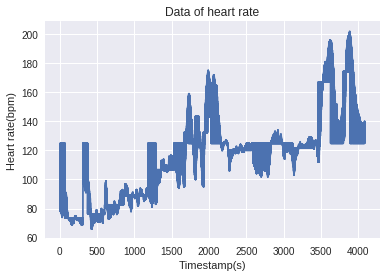

In [0]:
plt.title('Data of heart rate')
plt.xlabel('Timestamp(s)')
plt.ylabel('Heart rate(bpm)')
read_data=simple08.dropna(axis=0,how='any')
read_data=read_data.drop(['activityID'],axis=1).astype(float).dropna(axis=0,how='any')
plt.plot(read_data['timestamp'].values.astype(float),read_data['heart_rate'].values.astype(float))

Computeing different types of mean is a basic interpolation method, which does not use the characteristics of time series or the relationship between variables. This method is very fast in calculation, but it also has obvious disadvantage. One of the disadvantage is that mean interpolation reduces the variation and variance of data.According to the chart, it is result of filling in missing values. The variation of data was obviously a reduce.

In [0]:
# act_name=list(set(date['activityID'].values))
# datedd=datex
# for act in act_name:
#   mean_num = np.mean(datex[datex['activityID']== act]['heart_rate'])
#   datedd.loc[datedd['activityID']== act, ['heart_rate']]=datedd.loc[datedd['activityID']== act, ['heart_rate']].fillna(mean_num)

Analysis of data of temperature 

In [0]:
datb=copy_simple08

In [0]:
def labelxy():
  plt.xlabel('time')
  plt.ylabel('values')

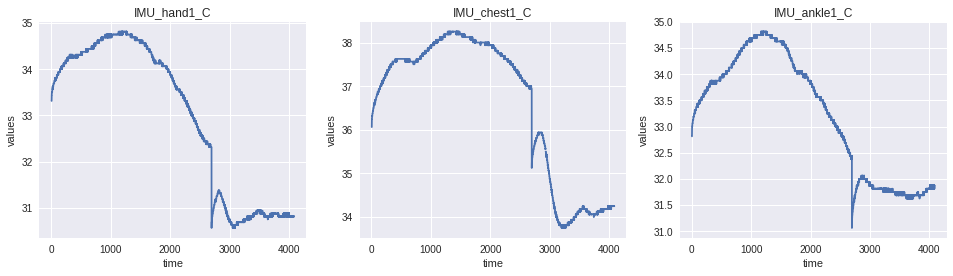

In [0]:
plt.figure(figsize=(3,3))
plt.subplots_adjust(2,2,6.2,3)
num=2
plt.subplot(131)
plt.title('IMU_hand1_C')
labelxy()
plt.plot(datb['timestamp'].values,datb['IMU_hand1_C'].values)
plt.subplot(132)
plt.title('IMU_chest1_C')
labelxy()
plt.plot(datb['timestamp'].values,datb['IMU_chest1_C'].values)
plt.subplot(133)
labelxy()
plt.title('IMU_ankle1_C')
plt.plot(datb['timestamp'].values,datb['IMU_ankle1_C'].values)

According to the above charts,  they show that there are a linear variation in data of different temperature. Therefore, we can use the method that calculate the average of the former values and the former number  of missing values. Moreover, the average will be filled in missing values. However, this method would increases the variance of data.

In [0]:
# datb=datedds

# plt.figure(figsize=(3,3))
# plt.subplots_adjust(2,2,6.2,3)
# num=2
# plt.subplot(131)
# plt.title('IMU_hand1_C')
# labelxy()
# plt.plot(datb['timestamp'].values,datb['IMU_hand1_C'].values)
# plt.subplot(132)
# plt.title('IMU_chest1_C')
# labelxy()
# plt.plot(datb['timestamp'].values,datb['IMU_chest1_C'].values)
# plt.subplot(133)
# labelxy()
# plt.title('IMU_ankle1_C')
# plt.plot(datb['timestamp'].values,datb['IMU_ankle1_C'].values)

In [0]:
datb=copy_simple08

In [0]:
datb.columns

Index(['timestamp', 'activityID', 'heart_rate', 'IMU_hand1_C',
       'IMU_hand2_ACC16', 'IMU_hand3_ACC16', 'IMU_hand4_ACC16',
       'IMU_hand5_ACC6', 'IMU_hand6_ACC6', 'IMU_hand7_ACC6', 'IMU_hand8_G',
       'IMU_hand9_G', 'IMU_hand10_G', 'IMU_hand11_M', 'IMU_hand12_M',
       'IMU_hand13_M', 'IMU_chest1_C', 'IMU_chest2_ACC16', 'IMU_chest3_ACC16',
       'IMU_chest4_ACC16', 'IMU_chest5_ACC6', 'IMU_chest6_ACC6',
       'IMU_chest7_ACC6', 'IMU_chest8_G', 'IMU_chest9_G', 'IMU_chest10_G',
       'IMU_chest11_M', 'IMU_chest12_M', 'IMU_chest13_M', 'IMU_ankle1_C',
       'IMU_ankle2_ACC16', 'IMU_ankle3_ACC16', 'IMU_ankle4_ACC16',
       'IMU_ankle5_ACC6', 'IMU ankle6_ACC6', 'IMU_ankle7_ACC6', 'IMU_ankle8_G',
       'IMU_ankle9_G', 'IMU_ankle10_G', 'IMU_ankle11_M', 'IMU_ankle12_M',
       'IMU_ankle13_M'],
      dtype='object')

In [0]:
# sns.pointplot(x='timestamp',y='IMU_hand2_ACC16',hue=None,data=datb)
# for i in datb.columns[2:4]:

def polt_feature(num):
  plt.figure(figsize=(4,4))
  plt.subplots_adjust(2,2,4.2,4)
  plt.subplot(221)
  cal_num=[]
  plt.title('IMU_hand1_C')
  for cal_num in datb.columns[num:num+2]:
    plt.plot(datb['timestamp'].values,datb[cal_num].values,alpha=0.5)
  plt.title('IMU_ACC16')
  plt.xlabel('time')
  plt.xlabel('values of ACC16')
  
  plt.subplot(222)
  cal_num=[]
  for cal_num in datb.columns[num+3:num+5]:
    plt.plot(datb['timestamp'].values,datb[cal_num].values,alpha=0.5)
  plt.title('IMU_ACC6')
  plt.xlabel('time')
  plt.xlabel('values of ACC6')
  
  
  plt.subplot(223)
  cal_num=[]
  for cal_num in datb.columns[num+6:num+8]:
    plt.plot(datb['timestamp'].values,datb[cal_num].values,alpha=0.5)
  plt.title('IMU_G')
  
  plt.xlabel('time')
  plt.xlabel('values of gyroscope')
  
  
  plt.subplot(224)
  cal_num=[]
  for cal_num in datb.columns[num+9:num+11]:
    plt.plot(datb['timestamp'].values,datb[cal_num].values,alpha=0.5)
  plt.title('IMU_M')
  
  
  plt.xlabel('time')
  plt.xlabel('values of magnetometer')
  

#### Data of IMU hand 

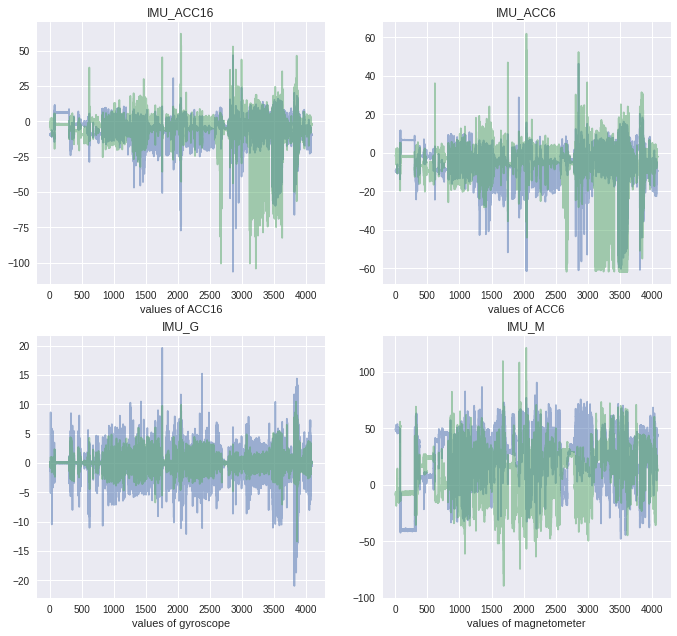

In [0]:
polt_feature(4)

From above four charts of hand, there were not a linear variation with a growth of time. For the first chart, second chart and third chart, their attribute were not a obvious similarities.However, for last chart of IMU_M, it shows that their attribute have a similar trend. Moreover, after comparing first and second charts, they illustrate a similar trend with a increase of time.

#### Data of IMU chest

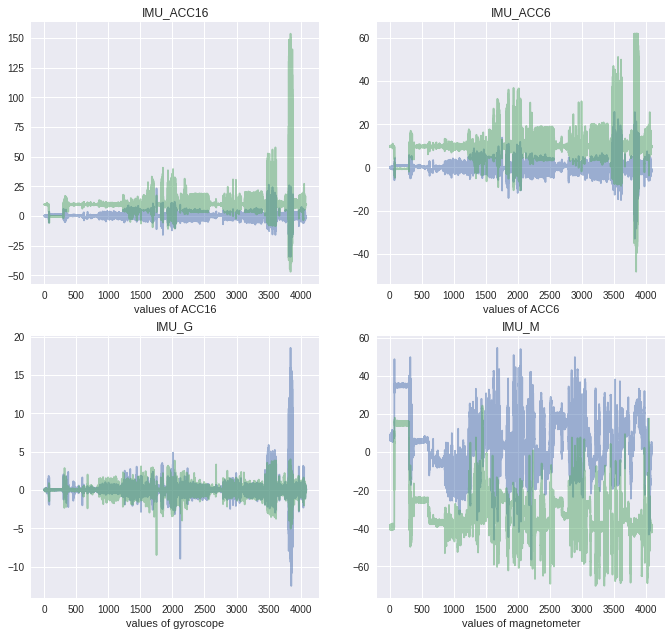

In [0]:
polt_feature(17)

From above charts, in first, second and fourth chart, it shows that there were a similar trend in attribute of three chart respectivitly. However, four charts did not show a obvious linear variations with a increase of time. Similarly, there was a significantly similar trends in first chart and second chart.

#### Data of IMU ankle

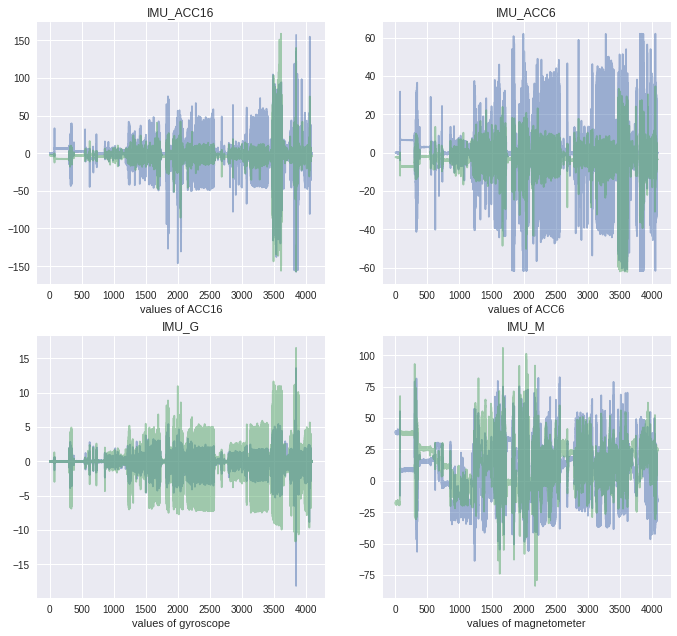

In [0]:
polt_feature(31)

According to the  above charts, Similarity, when time was increased, they did not show a obvious linear trends.Moreover, the fourth chart have a similar tendency of their attribute. 





First scenario of filling in missing values  
According to the above analysis and result of IMU data, their attribute did not show the obvious linear trends with a growth of time, However, the values of temperature have a significant linear tendency.
Therefore, I will use the method that compute the average of the former values and the former number  of missing values. Furthermore, the average will be filled in missing values. However, this method would increases the variance. So that, the first scenario will compare the sencond scenario.

In [0]:
datedds=simple08.interpolate(method='values')

Second scenario of drop missing values  


In [0]:
dat02=simple08.dropna()
print('Data size of missing values:',(1-(len(simple08)-len(dat02))/len(simple08)),'%')

Data size of missing values: 0.9872729946327476 %


For the method of drop missing values, this is to delete the object (tuple, record) with missing information attribute value to get complete data. This method is simple and easy. It is very effective when there are many missing values of attributes and the deleted object with missing values is very small compared with the amount of data in the information table. It is usually used when class labels (assumed to be classification tasks) are missing. However, this method has great limitations. It is to reduce historical data in exchange for information completeness, will cause a lot of waste of resources, discarding a large number of hidden information in these objects. When there are few objects in the information table, deleting a few objects can seriously affect the objectivity of the information and the correctness of the results; when the percentage of null values of each attribute changes greatly, its performance is very poor. Therefore, when the proportion of missing data is large, especially when the missing data is not randomly distributed, this method may lead to data deviation and lead to wrong conclusions. From above per cent of data that is missing, it shows that total missing values only occupy %0.0127%. Therefore, if we use this method to hand the missing data, It is very effective.

In [0]:
# dat03=copy_simple1.replace(['NaN'],np.nan)

### sample

In [0]:
def get_sample(df, sampling="simple_random", k=1, stratified_col=None):

    import random
    import pandas as pd
    from functools import reduce
    import numpy as np
    import math
    
    len_df = len(df)
    if k <= 0:
        raise AssertionError("k can not be negative")
    elif k >= 1:
        assert isinstance(k, int), "k must be positive"
        sample_by_n=True
        if sampling is "stratified":
            alln=k*df.groupby(by=stratified_col)[stratified_col[0]].count().count() 
            #alln=k*df[stratified_col].value_counts().count() 
            if alln >= len_df:
                raise AssertionError("please make sure that K times the number of layers does not exceed the total sample size.")
    else:
        sample_by_n=False
        if sampling in ("simple_random", "systematic"):
            k = math.ceil(len_df * k)
        
    #print(k)
    if sampling is "simple_random":
        print("simple")
        idx = random.sample(range(len_df), k)
        res_df = df.iloc[idx,:].copy()
        return res_df
    elif sampling is "systematic":
        print("system simple")
        step = len_df // k+1          #step=len_df//k-1
        start = 0                  #start=0
        idx = range(len_df)[start::step]  #idx=range(len_df+1)[start::step]
        res_df = df.iloc[idx,:].copy()
        #print("k=%d,step=%d,idx=%d"%(k,step,len(idx)))
        return res_df
    elif sampling is "stratified":
        assert stratified_col is not None, "Upload a list of column names that need to be hierarchical"
        assert all(np.in1d(stratified_col, df.columns)), "plese check your input column name"
        
        grouped = df.groupby(by=stratified_col)[stratified_col[0]].count()
        if sample_by_n==True:
            group_k = grouped.map(lambda x:k)
        else:
            group_k = grouped.map(lambda x: math.ceil(x * k))
        
        res_df = df.head(0)
        for df_idx in group_k.index:
            df1=df
            if len(stratified_col)==1:
                df1=df1[df1[stratified_col[0]]==df_idx]
            else:
                for i in range(len(df_idx)):
                    df1=df1[df1[stratified_col[i]]==df_idx[i]]
            idx = random.sample(range(len(df1)), group_k[df_idx])
            group_df = df1.iloc[idx,:].copy()
            res_df = res_df.append(group_df)
        return res_df
    else:
        raise AssertionError("sampling is illegal")

In [0]:
datA=datAs[['IMU_chest1_C','activityID','mean_acc6_chest','mean_g_chest','mean_m_chest','mean_acc16_chest']]

In [0]:
datA.shape

(408031, 6)

In [0]:
sns.boxplot(x='activityID',y='mean_acc6_chest',hue=None,data=datA)

In [0]:
sns.boxplot(x='activityID',y='mean_g_chest',hue=None,data=datA)

In [0]:
sns.boxplot(x='activityID',y='mean_m_chest',hue=None,data=datA)

In [0]:
sns.boxplot(x='activityID',y='mean_acc16_chest',hue=None,data=datA)

## 3.Correlation of temperature  (continuous variables) and  orthr  variables -linear model
  
  hypothesis testing  
  
  Modelling machine learning linear Regression   
  
  Generative model
  Training data 
  Model testing

In [0]:
datedd=datedds

### 3.1Analysis of temperature distribution

Text(0.5,1,'temperature of ankle')

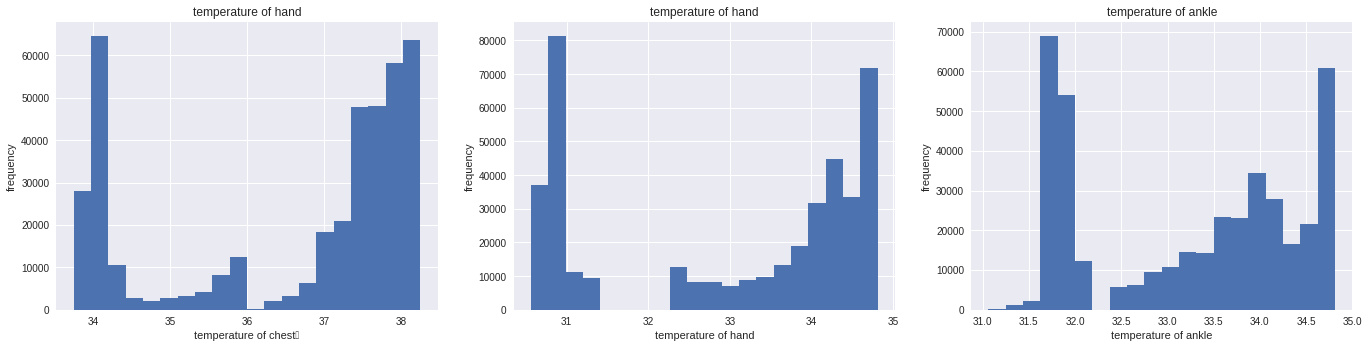

In [0]:
# dependent

plt.figure(figsize=(6,4))
plt.subplots_adjust(2,1,5,2)

plt.subplot(131)


datedds.IMU_chest1_C.hist(bins=20)
#dat0.price.plot(kind="hist",color='lightblue')
plt.xlabel("temperature of chest）")
plt.ylabel("frequency")
plt.title('temperature of hand')
plt.subplot(132)
datedds.IMU_hand1_C.hist(bins=20)
#dat0.price.plot(kind="hist",color='lightblue')
plt.xlabel("temperature of hand")
plt.ylabel("frequency")
plt.title('temperature of hand')
plt.subplot(133)
datedds.IMU_ankle1_C.hist(bins=20)
#dat0.price.plot(kind="hist",color='lightblue')
plt.xlabel("temperature of ankle")
plt.ylabel("frequency")
plt.title('temperature of ankle')

From to the above charts, the first chart show that values of temperature of chest was occupied 34 °C to 38 °C. The second chart illustrates the values of temperature of hand was between 31 °C and 35 °C. Howover, there were not  the values of approximately 31 °C to 32 °C. Moreover,  for the chart of temperature of ankle, it show that the values was about  31 °C to 35 °C. According to the normal temperature is 36 °C to 37  °C. Therefore,  the data of chest temperature will be mainly researched.

### 3.2 Compuating value counts of types of activities

Number of each activity



,value_counts
other,145929
ironing,32990
walking,31533
Nordic walking,28888
cycling,25475
standing,25160
vacuum cleaning,24292
lying,24165
sitting,22923
running,16532


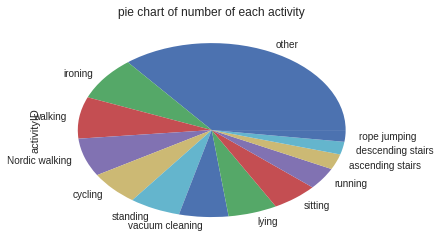

In [0]:
print('Number of each activity\n')
plt.title('pie chart of number of each activity')
datedds.activityID.value_counts().plot(kind='pie')
datedds.activityID.agg(['value_counts'])

From above table and pie chart,  they show that values counts of other was greater than other activities 145929. Moreover, values counts of  ironing and walking were occupied second and thrid place respectivitly. Howover, values counts of rope jumping was smaller than others. Values counts of other activities were between 11683 and 28888. According to the above result, it show that they values counts had a obvious different. Therefore,  we need stratified sampling for hypothesis testing. The reason is that stratified sampling can reduce the sampling error associated with simple random samples.

### 3.3 Average of temperature data

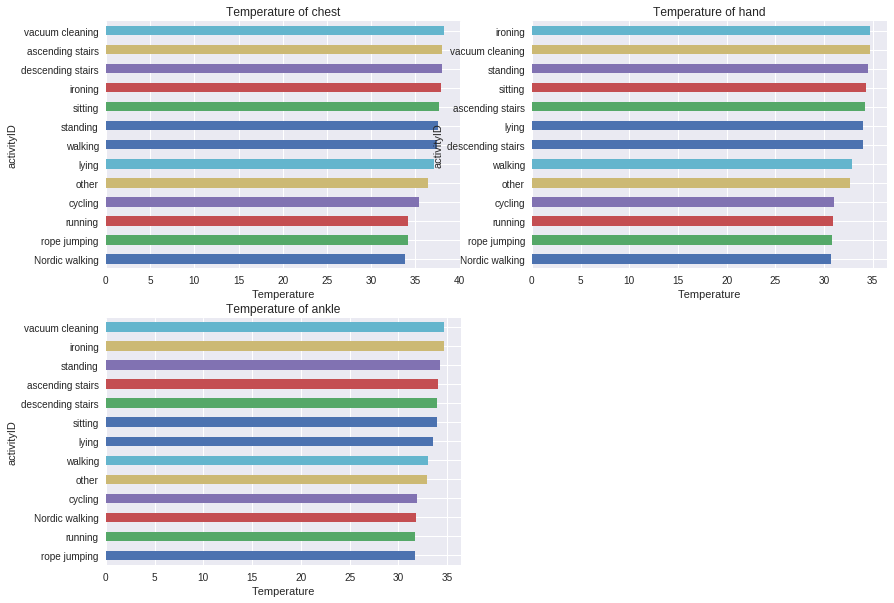

In [0]:
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.title('Temperature of chest')
plt.xlabel('Temperature')
copy_simple1['IMU_chest1_C'].astype(float).groupby(copy_simple.activityID).mean().sort_values(ascending=True).plot(kind='barh')
plt.subplot(222)
plt.title('Temperature of hand')
plt.xlabel('Temperature')
copy_simple1['IMU_hand1_C'].astype(float).groupby(copy_simple.activityID).mean().sort_values(ascending=True).plot(kind='barh')
plt.subplot(223)
plt.title('Temperature of ankle')
plt.xlabel('Temperature')
copy_simple1['IMU_ankle1_C'].astype(float).groupby(copy_simple.activityID).mean().sort_values(ascending=True).plot(kind='barh')

From above charts of correlation of different activities and temperture average the first chart of temperture shows that average of  vacuum cleaning, ascending stairs, descending stairs and ironing were similar and greater than other values. However, Nordic walking was the smallest. Moreover, the second chart of temperature of hand illustrates the average of vacuum cleaning and ironing were similar and higher than other activities. The activity of lowest values also was Nordic walking. Similarly, for the third chart,  the  highest were vacuum cleaning and ironing. However,activity of  the smallest values was rope jumping.   According to the above analysis,  vacuum cleaning and ironing were the highest values.

### 3.4 Avarage box plot of activities and temperature

In [0]:
def box_plot(name1,name2,name3,name4,titlename1,titlename2,titlename3):
  plt.figure(figsize=(5,3))
  plt.subplots_adjust(2,1,5,2)
  plt.subplot(131)
  dat1=datedds[['activityID',name1]]
  dat1.activityID=dat1.activityID.astype("category")
  plt.xticks(rotation=40)
  sns.boxplot(x='activityID',y=name1,data=dat1)
  plt.ylabel(name4)
  plt.xlabel('Activities')
#   plt.title('Activities and Temperature of chest')
  plt.title(titlename1)

  plt.subplot(132)
  dat1=datedds[['activityID',name2]]
  dat1.activityID=dat1.activityID.astype("category")
  plt.xticks(rotation=40)
  sns.boxplot(x='activityID',y=name2,data=dat1)
  plt.ylabel(name4)
  plt.xlabel('Activities')
#   plt.title('Activities and Temperature of hand')
  plt.title(titlename2)

  plt.subplot(133)
  dat1=datedds[['activityID',name3]]
  dat1.activityID=dat1.activityID.astype("category")
  plt.xticks(rotation=40)
  sns.boxplot(x='activityID',y=name3,data=dat1)
  plt.ylabel(name4)
  plt.xlabel('Activities')
#   plt.title('Activities and Temperature of ankle')
  plt.title(titlename3)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


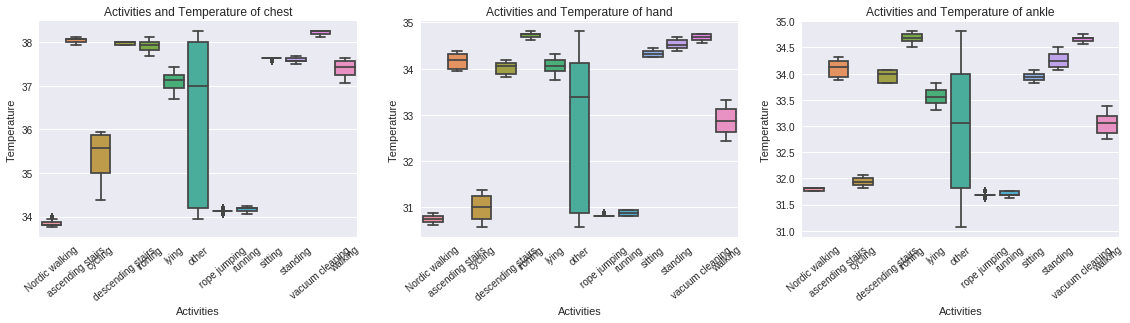

In [0]:
box_plot('IMU_chest1_C','IMU_hand1_C','IMU_ankle1_C','Temperature','Activities and Temperature of chest','Activities and Temperature of hand','Activities and Temperature of ankle')

According to the above three box plot,  they show that different types of activties have obvious different average and median. Therefore, different types of activities  have an influence on temperature of hand, chest and ankle. Therefore, we can use different temperature to predict type of activities and vice versa. Different types of activities also can predct temperature.

In [0]:
plt.figure(figsize=(5,3))
plt.subplots_adjust(2,1,5,2)
plt.subplot(131)
dat1=datedds[['heart_rate','IMU_chest1_C']]
dat1.activityID=dat1.activityID.astype("category")
dat1['IMU_chest1_C']=dat1['IMU_chest1_C'].astype(float)
plt.xticks(rotation=37)
sns.boxplot(x='heart_rate',y='IMU_chest1_C',data=dat1)
plt.ylabel('Temperature')
plt.xlabel('Activities')
plt.title('Activities and Temperature of chest')

plt.subplot(132)
dat1=datedds[['activityID','IMU_hand1_C']]
dat1.activityID=dat1.activityID.astype("category")
dat1['IMU_chest1_C']=dat1['IMU_hand1_C'].astype(float)
plt.xticks(rotation=37)
sns.boxplot(x='activityID',y='IMU_hand1_C',data=dat1)
plt.ylabel('Temperature')
plt.xlabel('Activities')
plt.title('Activities and Temperature of hand')

plt.subplot(133)
dat1=datedds[['activityID','IMU_ankle1_C']]
dat1.activityID=dat1.activityID.astype("category")
dat1['IMU_chest1_C']=dat1['IMU_ankle1_C'].astype(float)
plt.xticks(rotation=37)
sns.boxplot(x='activityID',y='IMU_ankle1_C',data=dat1)
plt.ylabel('Temperature')
plt.xlabel('Activities')
plt.title('Activities and Temperature of ankle')

In [0]:
print('Information of IMU_chest1_C\n',datedds.IMU_chest1_C.agg(['mean','median','std']))
print('Information of IMU_hand1_C\n',datedds.IMU_hand1_C.agg(['mean','median','std']))
print('Information of IMU_ankle1_C\n',datedds.IMU_ankle1_C.agg(['mean','median','std']))

Information of IMU_chest1_C
 mean      36.576849
median    37.500000
std        1.630682
Name: IMU_chest1_C, dtype: float64
Information of IMU_hand1_C
 mean      32.964542
median    33.687500
std        1.618991
Name: IMU_hand1_C, dtype: float64
Information of IMU_ankle1_C
 mean      33.203022
median    33.500000
std        1.148529
Name: IMU_ankle1_C, dtype: float64


In [0]:
print('Information of IMU_chest1_C\n',datedds.IMU_chest1_C.quantile([0.25,0.5,0.75]))
print('Information of IMU_hand1_C\n',datedds.IMU_chest1_C.quantile([0.25,0.5,0.75]))
print('Information of IMU_ankle1_C\n',datedds.IMU_chest1_C.quantile([0.25,0.5,0.75]))

Information of IMU_chest1_C
 0.25    34.3125
0.50    37.5000
0.75    37.9375
Name: IMU_chest1_C, dtype: float64
Information of IMU_hand1_C
 0.25    34.3125
0.50    37.5000
0.75    37.9375
Name: IMU_chest1_C, dtype: float64
Information of IMU_ankle1_C
 0.25    34.3125
0.50    37.5000
0.75    37.9375
Name: IMU_chest1_C, dtype: float64


From above information, mean,median and standard deviation of  the temperature of chest were 36.576, 37.5 and 1.63 respectively. Moreover, mean,median and standard deviation of  the temperature of hand were 32.964, 33.68 and 1.61 respectively. For the temperature of ankle, it show that mean,median and standard deviation were 33.20, 33.50 and 1.148 respectively. Therefore. temperature of chest was most different by the std.

constant 

In [0]:
datedd.columns

Index(['timestamp', 'activityID', 'heart_rate', 'IMU_hand1_C',
       'IMU_hand2_ACC16', 'IMU_hand3_ACC16', 'IMU_hand4_AAC16',
       'IMU_hand5_ACC6', 'IMU_hand6_ACC6', 'IMU_hand7_ACC6', 'IMU_hand8_G',
       'IMU_hand9_G', 'IMU_hand10_G', 'IMU_hand11_M', 'IMU_hand12_M',
       'IMU_hand13_M', 'IMU_chest1_C', 'IMU_chest2_ACC16', 'IMU_chest3_ACC16',
       'IMU_chest4_ACC16', 'IMU_chest5_ACC6', 'IMU_chest6_ACC6',
       'IMU_chest7_ACC6', 'IMU_chest8_G', 'IMU_chest9_G', 'IMU_chest10_G',
       'IMU_chest11_M', 'IMU_chest12_M', 'IMU_chest13_M', 'IMU_ankle1_C',
       'IMU_ankle2_ACC16', 'IMU_ankle3_ACC16', 'IMU_ankle4_ACC16',
       'IMU_ankle5_ACC6', 'IMU ankle6_ACC6', 'IMU_ankle7_ACC6', 'IMU_ankle8_G',
       'IMU_ankle9_G', 'IMU_ankle10_G', 'IMU_ankle11_M', 'IMU_ankle12_M',
       'IMU_ankle13_M'],
      dtype='object')

### 3.5  Distribution  of temperature and oter variables

In [0]:
def plot_scatter(name1,name2,name3):
  plt.figure(figsize=(5,3))
  plt.subplots_adjust(2,1,5,2)
  plt.subplot(131)
  plt.scatter(datedds['IMU_hand2_ACC16'],datedds[name1],marker='.')
  plt.ylabel(name1)
  plt.xlabel('3D-acceleration')
  plt.title('Correlation of 3D-acceleration of hand and '+name1)

  plt.subplot(132)
  plt.scatter(datedds['IMU_hand11_M'],datedds[name2],marker='.')
  plt.ylabel(name2)
  plt.xlabel('3D-magnetometer')
  plt.title('Correlation of 3D-magnetometer of chest and '+name2)

  plt.subplot(133)
  plt.scatter(datedds['IMU_hand9_G'],datedds[name3],marker='.')
  plt.ylabel(name3)
  plt.xlabel('3D-gyroscope')
  plt.title('Correlation of 3D-gyroscope of ankle and '+name3)

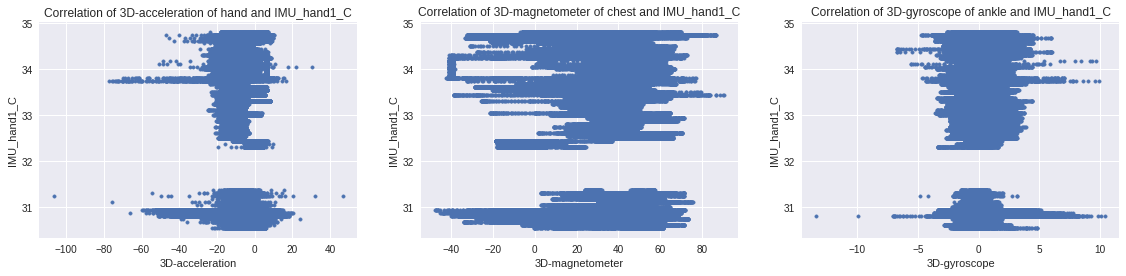

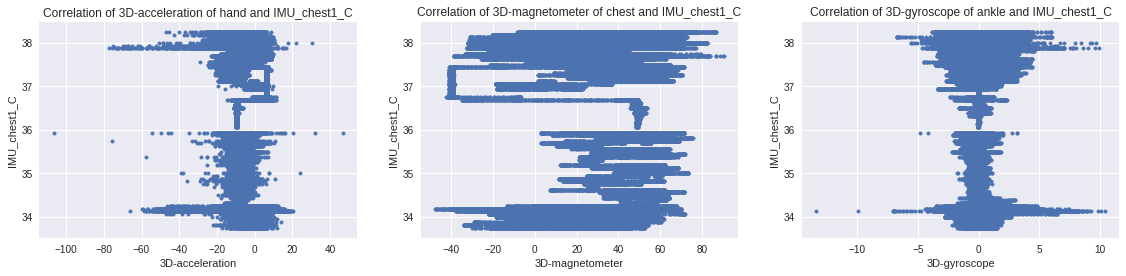

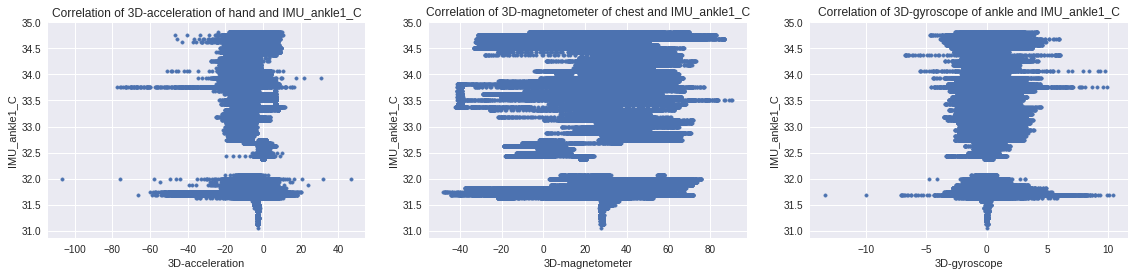

In [0]:
plot_scatter('IMU_hand1_C','IMU_hand1_C','IMU_hand1_C')
plot_scatter('IMU_chest1_C','IMU_chest1_C','IMU_chest1_C')
plot_scatter('IMU_ankle1_C','IMU_ankle1_C','IMU_ankle1_C')

According to the above charts of relationship of temperature and acceleration data,gyroscope data and magnetometer data., they show that most data point were focus on one fixed X-axis and few points spread to both sides. 

### 3.6 Pearson product-moment correlation coefficient of IMU data

According to above analysis, I only use the data of chest for following reseach.

In [0]:
# datedd[datedd.columns[4:10]].corr(method='pearson')
dats=datedd.drop(['activityID'],axis=1)

print('correlation of temperature of chest')
dats.corr(method='pearson')['IMU_chest1_C'][15:28]

IMU_chest1_C        1.000000
IMU_chest2_ACC16    0.079908
IMU_chest3_ACC16   -0.064977
IMU_chest4_ACC16    0.003362
IMU_chest5_ACC6     0.107993
IMU_chest6_ACC6    -0.066299
IMU_chest7_ACC6     0.017590
IMU_chest8_G       -0.002436
IMU_chest9_G       -0.030573
IMU_chest10_G       0.007954
IMU_chest11_M      -0.112037
IMU_chest12_M       0.202045
IMU_chest13_M      -0.095897
Name: IMU_chest1_C, dtype: float64

According to the above results of correlation of temperature and other attribute of chest,  IMU_chest12_M has the highest correlation with temperature. However, there was smallest correlation of IMU_chest8_G and temperature. Moreover,amlost all attribute of chest have a corrrelation with temperature.

In [0]:
datedd[datedd.columns[18:23]].corr(method='pearson')

,IMU_chest3_ACC16,IMU_chest4_ACC16,IMU_chest5_ACC6,IMU_chest6_ACC6,IMU_chest7_ACC6
IMU_chest3_ACC16,1.000000,-0.183081,-0.040897,0.963088,-0.156324
IMU_chest4_ACC16,-0.183081,1.000000,-0.041650,-0.218036,0.961002
IMU_chest5_ACC6,-0.040897,-0.041650,1.000000,-0.016365,-0.078580
IMU_chest6_ACC6,0.963088,-0.218036,-0.016365,1.000000,-0.194590
IMU_chest7_ACC6,-0.156324,0.961002,-0.078580,-0.194590,1.000000


From the above table, 3D-acceleration data±16g and 3D-acceleration data±6g have a strong relationships. 

### 3.7 Hypothesis testing

In [0]:
datedk=datedd.dropna()

In [0]:
dat01=get_sample(datedk,sampling="stratified", k=300, stratified_col=['activityID'])

For the hypothesis testing, we need to ues stratified sampling to recollect the data. The reason is that each types of activities have a same sample size for T test and p-value. Moreover, p value was Inaccurate for  huge amounts of original data size.  According to the law of large numbers, I will use each type of activities that there were have 300 data size for hypothesis testing.

H0 : There is a relationship between temperature of chest and other attribute of chest  
H1: There is not a relationship between temperature of chest and other attribute of chest  
Significance level is 0.001

In [0]:
dat01=dat01.dropna()

In [0]:
# dat01['ln_hand_C']=np.log(dat01['IMU_hand1_C'])

In [0]:
from scipy import stats

In [0]:
dat01.columns[17:29]

Index(['IMU_chest2_ACC16', 'IMU_chest3_ACC16', 'IMU_chest4_ACC16',
       'IMU_chest5_ACC6', 'IMU_chest6_ACC6', 'IMU_chest7_ACC6', 'IMU_chest8_G',
       'IMU_chest9_G', 'IMU_chest10_G', 'IMU_chest11_M', 'IMU_chest12_M',
       'IMU_chest13_M'],
      dtype='object')

In [0]:
print('P value and T test of heart rate and temperature:',stats.ttest_ind(dat01['IMU_chest1_C'].values,dat01['heart_rate'].values))

P value and T test of heart rate and temperature: Ttest_indResult(statistic=-161.95232083359844, pvalue=0.0)


In [0]:
for anum in dat01.columns[17:29]:
  print('P value and T test of '+anum+ ' temperature:',stats.ttest_ind(dat01['IMU_chest1_C'].values,dat01[anum].values))

P value and T test of IMU_chest2_ACC16 temperature: Ttest_indResult(statistic=843.9520358055698, pvalue=0.0)
P value and T test of IMU_chest3_ACC16 temperature: Ttest_indResult(statistic=233.25584519516622, pvalue=0.0)
P value and T test of IMU_chest4_ACC16 temperature: Ttest_indResult(statistic=468.88024273373975, pvalue=0.0)
P value and T test of IMU_chest5_ACC6 temperature: Ttest_indResult(statistic=874.9901420961731, pvalue=0.0)
P value and T test of IMU_chest6_ACC6 temperature: Ttest_indResult(statistic=253.73798877787237, pvalue=0.0)
P value and T test of IMU_chest7_ACC6 temperature: Ttest_indResult(statistic=465.8674831849635, pvalue=0.0)
P value and T test of IMU_chest8_G temperature: Ttest_indResult(statistic=1305.478391993077, pvalue=0.0)
P value and T test of IMU_chest9_G temperature: Ttest_indResult(statistic=1294.9796249215174, pvalue=0.0)
P value and T test of IMU_chest10_G temperature: Ttest_indResult(statistic=1359.5266028379365, pvalue=0.0)
P value and T test of IMU_ch

According to the above results of p value of temperature and other attribute, all p values is smaller than 0.001. Therefore these attribute is relate the temperature of chest.

In [0]:
print("dist P values of IMU_chest1_C~ C(activityID):%.4f" %sm.stats.anova_lm(ols('IMU_chest1_C~ C(activityID)',data=dat01).fit())._values[0][4])
print("dist P values of IMU_ankle1_C~ C(activityID):%.4f " %sm.stats.anova_lm(ols('IMU_ankle1_C~ C(activityID)',data=dat01).fit())._values[0][4])
print("dist P values of IMU_ankle1_C~ C(activityID):%.4f " %sm.stats.anova_lm(ols('IMU_hand1_C~ C(activityID)',data=dat01).fit())._values[0][4])

dist P values of IMU_chest1_C~ C(activityID):0.0000
dist P values of IMU_ankle1_C~ C(activityID):0.0000 
dist P values of IMU_ankle1_C~ C(activityID):0.0000 


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


From the above results, they show that p values was smaller 0.001. Similiarly, there are a relationship of types of activities.  

### 3.8 Modeling- linear regression

In [0]:
myss=''
for nam in datedk.columns[2:3]:
  myss=myss+'+'+nam
for nam in datedk.columns[17:29]:
  myss=myss+'+'+nam
myss

'+heart_rate+IMU_chest2_ACC16+IMU_chest3_ACC16+IMU_chest4_ACC16+IMU_chest5_ACC6+IMU_chest6_ACC6+IMU_chest7_ACC6+IMU_chest8_G+IMU_chest9_G+IMU_chest10_G+IMU_chest11_M+IMU_chest12_M+IMU_chest13_M'

In [0]:
# datedk=dat01

In [0]:
# lm1=ols('IMU_chest1_C~ C(activityID)'+ myss,data=datedk).fit()
# lm1_summary=lm1.summary()
# print(lm1_summary)

In [0]:
set(dat01.activityID.values)

{'Nordic walking',
 'ascending stairs',
 'cycling',
 'descending stairs',
 'ironing',
 'lying',
 'other',
 'rope jumping',
 'running',
 'sitting',
 'standing',
 'vacuum cleaning',
 'walking'}

In [0]:
lm1=ols('IMU_chest1_C~ C(activityID)'+ myss,data=datedk).fit()
lm1_summary=lm1.summary()
print(lm1_summary)

                            OLS Regression Results                            
Dep. Variable:           IMU_chest1_C   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                 2.684e+04
Date:                Mon, 07 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:18:51   Log-Likelihood:            -5.8007e+05
No. Observations:              408030   AIC:                         1.160e+06
Df Residuals:                  408004   BIC:                         1.160e+06
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

From above table, it show that R-squared is 0.622 and greater than 0.5, this is better linear model. In general,  if the values of R-squared is higer, the model is better. However, it is based on the real practice of model. Moreover, firstly, according to the row of coef, temperature of ascending stairs is greater than Nordic walking about 4.3860 °C. Temperature of cycling is higger than Nordic walking about 1.5466 °C.  Similarly, descending stairs was higger than Nordic walking  4.4489 °C, and so on. Other types of activity is same way to reading. Secondly,  for correlation of heart rate and temperature, it show that when the heart rate increase 1 bpm, its temperature reduce 0.0198 °C. Finally, for IMU data, if IMU_chest2_ACC16 increse 1 ms-2, the temperture of chest decrease 0.1306 °C. Furthermore, when IMU_chest12_M6 increase 1 μT, the temperture raise 0.0207 °C ,and so on. According to the table, it show that p values of  IMU_chest6_ACC6  and IMU_chest8_G greather than 0.001. Therefore, they will be drop for model optimization.

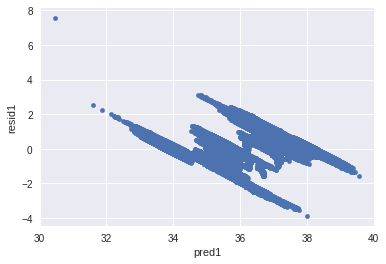

In [0]:
datedk['pred1']=lm1.predict(datedk)
datedk['resid1']=lm1.resid
datedk.plot('pred1','resid1',kind='scatter')

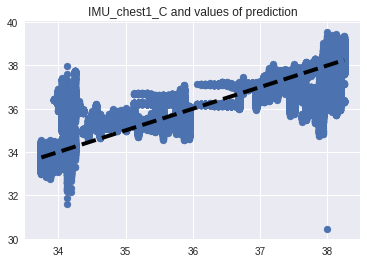

In [0]:
plt.title('IMU_chest1_C and values of prediction')
plt.scatter(datedk['IMU_chest1_C'], datedk['pred1'])
plt.plot([datedk['IMU_chest1_C'].min(), datedk['IMU_chest1_C'].max()], [datedk['IMU_chest1_C'].min(), datedk['IMU_chest1_C'].max()], 'k--', lw=4)
plt.show()

According to the above chart,  the points is fouce on the line of temperature of chest. Therefore, the result of prediction is similar the temperature. However, it also have some points were far from the line. So that the model need to optimize.

In [0]:
datedk['pred1']=lm1.predict(datedk)
datedk['resid1']=lm1.resid
datedk.plot('pred1','resid1',kind='scatter')

### 3.9 Model optimization 

In [0]:
myss=''
for nam in datedk.columns[2:3]:
  myss=myss+'+'+nam
for nam in datedk.columns[17:21]:
  myss=myss+'+'+nam
for nam in datedk.columns[22:23]:
  myss=myss+'+'+nam
for nam in datedk.columns[24:29]:
  myss=myss+'+'+nam
myss

'+heart_rate+IMU_chest2_ACC16+IMU_chest3_ACC16+IMU_chest4_ACC16+IMU_chest5_ACC6+IMU_chest7_ACC6+IMU_chest9_G+IMU_chest10_G+IMU_chest11_M+IMU_chest12_M+IMU_chest13_M'

In [0]:
myss=''
for nam in datedk.columns[2:3]:
  myss=myss+'+'+nam
for nam in datedk.columns[17:29]:
  myss=myss+'+'+nam
myss

In [0]:
myss

'+heart_rate+IMU_hand2_ACC16+IMU_hand3_ACC16+IMU_hand4_AAC16+IMU_hand5_ACC6+IMU_hand6_ACC6+IMU_hand7_ACC6+IMU_hand9_G+IMU_hand10_G+IMU_hand11_M+IMU_hand12_M+IMU_hand13_M'

In [0]:
datedk['resid_t']=(datedk['resid1']-datedk['resid1'].mean())/datedk['resid1'].std()

datedkk=datedk[abs(datedk['resid_t'])>2].copy()

In [0]:
lm1=ols('IMU_chest1_C~ C(activityID)'+ myss,data=datedk).fit()
lm1_summary=lm1.summary()
print(lm1_summary)

                            OLS Regression Results                            
Dep. Variable:           IMU_chest1_C   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                 2.918e+04
Date:                Mon, 07 Jan 2019   Prob (F-statistic):               0.00
Time:                        20:42:47   Log-Likelihood:            -5.8007e+05
No. Observations:              408030   AIC:                         1.160e+06
Df Residuals:                  408006   BIC:                         1.160e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

According to the above table, when data of IMU_chest6_ACC6 and IMU_chest8_G were droped, they can not change the R-squared. Therefore, two attribute were not a relationsihp with temparture.

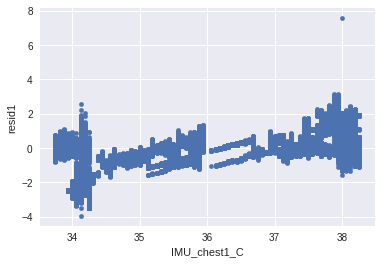

In [0]:
datedk['pred1']=lm1.predict(datedkk)
datedk['resid1']=lm1.resid
datedk.plot('IMU_chest1_C','resid1',kind='scatter')

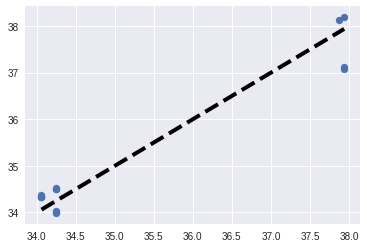

In [0]:
plt.scatter(datedkk['IMU_chest1_C'], datedkk['pred1'])
plt.plot([datedkk['IMU_chest1_C'].min(), datedkk['IMU_chest1_C'].max()], [datedkk['IMU_chest1_C'].min(), datedkk['IMU_chest1_C'].max()], 'k--', lw=4)
plt.show()

### 3.10 Summary 

### model text

In [0]:
# dat01=get_sample(datA,sampling="stratified", k=600, stratified_col=['activityID'])

In [0]:
datA=datAs[['IMU_chest1_C','activityID','mean_acc6_chest','mean_g_chest','mean_m_chest','mean_acc16_chest']]
dat02=datA.dropna()

In [0]:
dat02.shape

(406723, 6)

In [0]:
y=dat02[['activityID']]
x=dat02[['IMU_chest1_C','mean_acc6_chest','mean_g_chest','mean_m_chest','mean_acc16_chest']].dropna()
xa=x.astype(float)
xp=xa.abs()

In [0]:
corrmatrix=x.corr(method='spearman')
corrmatrix_new=corrmatrix[np.abs(corrmatrix)>0.5]

In [0]:
#共线性
corrmatrix_new

In [0]:
print(dat02.isnull().any()) 

In [0]:
dat02['bins']=pd.qcut(dat02.mean_acc6_chest,5)


## 4. Correlation of heart rate (bpm) ,IMU hand,IMU chest ,IMU ankle and activities (categorical variables)-Classification model

### 4.1 Spearman correlation of IMU hand variables

In [0]:
# corrmatrix=datedd.corr(method='spearman')
# corrmatrix_new=corrmatrix[np.abs(corrmatrix)>0.5]
# corrmatrix_new

In [0]:
datedd_hand=datedd[datedd.columns[4:10]]
corrmatrix=datedd_hand.corr(method='spearman')
corrmatrix_new=corrmatrix[np.abs(corrmatrix)>0.5]
corrmatrix_new

,IMU_hand2_ACC16,IMU_hand3_ACC16,IMU_hand4_ACC16,IMU_hand5_ACC6,IMU_hand6_ACC6,IMU_hand7_ACC6
IMU_hand2_ACC16,1.000000,NaN,NaN,0.986646,NaN,NaN
IMU_hand3_ACC16,NaN,1.00000,NaN,NaN,0.97892,NaN
IMU_hand4_ACC16,NaN,NaN,1.000000,NaN,NaN,0.982125
IMU_hand5_ACC6,0.986646,NaN,NaN,1.000000,NaN,NaN
IMU_hand6_ACC6,NaN,0.97892,NaN,NaN,1.00000,NaN
IMU_hand7_ACC6,NaN,NaN,0.982125,NaN,NaN,1.000000


In [0]:
datedd_hand=datedd[datedd.columns[10:16]]
corrmatrix=datedd_hand.corr(method='spearman')
corrmatrix_new=corrmatrix[np.abs(corrmatrix)>0.5]
corrmatrix_new

,IMU_hand8_G,IMU_hand9_G,IMU_hand10_G,IMU_hand11_M,IMU_hand12_M,IMU_hand13_M
IMU_hand8_G,1.0,NaN,NaN,NaN,NaN,NaN
IMU_hand9_G,NaN,1.0,NaN,NaN,NaN,NaN
IMU_hand10_G,NaN,NaN,1.0,NaN,NaN,NaN
IMU_hand11_M,NaN,NaN,NaN,1.0,NaN,NaN
IMU_hand12_M,NaN,NaN,NaN,NaN,1.0,NaN
IMU_hand13_M,NaN,NaN,NaN,NaN,NaN,1.0


According to the above two tables of data of hand,  the 3D-gyroscope data had no significant relation with the 3D-magnetometer data, but was related to the 3D-acceleration data ±16g and the 3D-acceleration data ±6gt.

### 4.2 Spearman correlation of IMU chest variables

In [0]:
datedd_hand=datedd[datedd.columns[17:23]]
corrmatrix=datedd_hand.corr(method='spearman')
corrmatrix_new=corrmatrix[np.abs(corrmatrix)>0.5]
corrmatrix_new

,IMU_chest2_ACC16,IMU_chest3_ACC16,IMU_chest4_ACC16,IMU_chest5_ACC6,IMU_chest6_ACC6,IMU_chest7_ACC6
IMU_chest2_ACC16,1.000000,NaN,NaN,0.970719,NaN,NaN
IMU_chest3_ACC16,NaN,1.000000,NaN,NaN,0.956008,NaN
IMU_chest4_ACC16,NaN,NaN,1.000000,NaN,NaN,0.963874
IMU_chest5_ACC6,0.970719,NaN,NaN,1.000000,NaN,NaN
IMU_chest6_ACC6,NaN,0.956008,NaN,NaN,1.000000,NaN
IMU_chest7_ACC6,NaN,NaN,0.963874,NaN,NaN,1.000000


In [0]:
datedd_hand=datedd[datedd.columns[23:29]]
corrmatrix=datedd_hand.corr(method='spearman')
corrmatrix_new=corrmatrix[np.abs(corrmatrix)>0.5]
corrmatrix_new

,IMU_chest8_G,IMU_chest9_G,IMU_chest10_G,IMU_chest11_M,IMU_chest12_M,IMU_chest13_M
IMU_chest8_G,1.0,NaN,NaN,NaN,NaN,NaN
IMU_chest9_G,NaN,1.0,NaN,NaN,NaN,NaN
IMU_chest10_G,NaN,NaN,1.0,NaN,NaN,NaN
IMU_chest11_M,NaN,NaN,NaN,1.0,NaN,NaN
IMU_chest12_M,NaN,NaN,NaN,NaN,1.0,NaN
IMU_chest13_M,NaN,NaN,NaN,NaN,NaN,1.0


From to the above two tables of data of chest, there was a relationship to the 3D-acceleration data ±16g and the 3D-acceleration data ±6gt. However, the 3D-gyroscope data had no significant relation with the 3D-magnetometer data.


### 4.3 Spearman correlation of IMU ankle variables

In [0]:
datedd_hand=datedd[datedd.columns[30:36]]
corrmatrix=datedd_hand.corr(method='spearman')
corrmatrix_new=corrmatrix[np.abs(corrmatrix)>0.5]
corrmatrix_new

,IMU_ankle2_ACC16,IMU_ankle3_ACC16,IMU_ankle4_ACC16,IMU_ankle5_ACC6,IMU ankle6_ACC6,IMU_ankle7_ACC6
IMU_ankle2_ACC16,1.000000,NaN,NaN,0.924601,NaN,NaN
IMU_ankle3_ACC16,NaN,1.000000,NaN,NaN,0.920019,NaN
IMU_ankle4_ACC16,NaN,NaN,1.000000,NaN,NaN,0.915939
IMU_ankle5_ACC6,0.924601,NaN,NaN,1.000000,NaN,NaN
IMU ankle6_ACC6,NaN,0.920019,NaN,NaN,1.000000,NaN
IMU_ankle7_ACC6,NaN,NaN,0.915939,NaN,NaN,1.000000


In [0]:
datedd_hand=datedd[datedd.columns[36:42]]
corrmatrix=datedd_hand.corr(method='spearman')
corrmatrix_new=corrmatrix[np.abs(corrmatrix)>0.5]
corrmatrix_new

,IMU_ankle8_G,IMU_ankle9_G,IMU_ankle10_G,IMU_ankle11_M,IMU_ankle12_M,IMU_ankle13_M
IMU_ankle8_G,1.0,NaN,NaN,NaN,NaN,NaN
IMU_ankle9_G,NaN,1.000000,0.625446,NaN,NaN,NaN
IMU_ankle10_G,NaN,0.625446,1.000000,NaN,NaN,NaN
IMU_ankle11_M,NaN,NaN,NaN,1.0,NaN,NaN
IMU_ankle12_M,NaN,NaN,NaN,NaN,1.0,NaN
IMU_ankle13_M,NaN,NaN,NaN,NaN,NaN,1.0


From the above two tables, similarly, the 3D-acceleration data ±16g and the 3D-acceleration data ±6gt have a relationship. Moreover, IMU_ankle9_G	 and  IMU_ankle10_G also have a significant relationship.


### 4.4 Correlation of heart rate (bpm)  and activities

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5,1,'Activities and heart_rate')

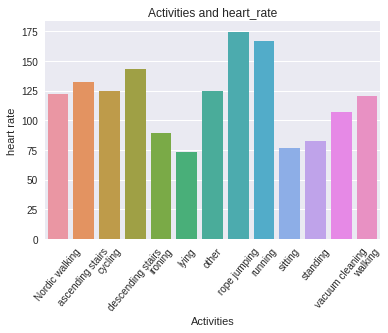

In [0]:
  dat1=datedds[['activityID','heart_rate']]
  dat1.activityID=dat1.activityID.astype("category")
  plt.xticks(rotation=50)
  sns.barplot(x='activityID',y='heart_rate',data=dat1)
  plt.ylabel('heart rate')
  plt.xlabel('Activities')
  plt.title('Activities and heart_rate')

From the above bar chart of types of activity and heart rate,  The highest type of acitivity was rope jumping. Moreover,  running has a second place. However, lyin has a smallest heart rate.Furthermore, this bar chart significantly illustrates that each types of activity have different values of heart rate.

### 4.5 Correlation of IMU hand and activites

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


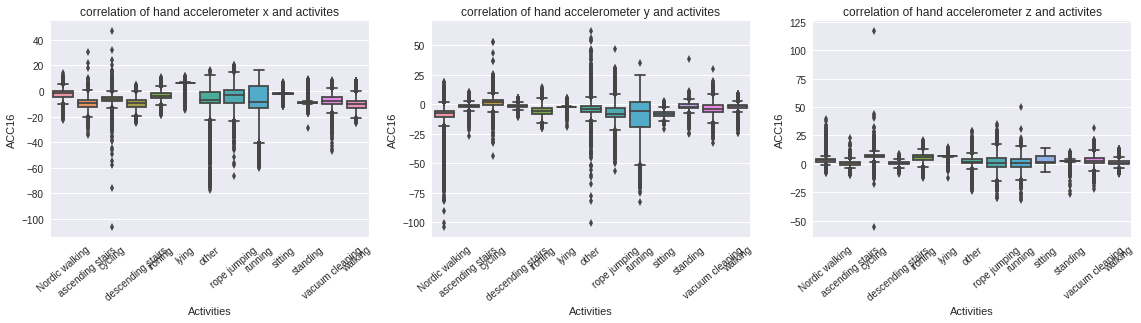

In [0]:
box_plot('IMU_hand2_ACC16','IMU_hand3_ACC16','IMU_hand4_AAC16','ACC16','correlation of hand accelerometer x and activites','correlation of hand accelerometer y and activites','correlation of hand accelerometer z and activites')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


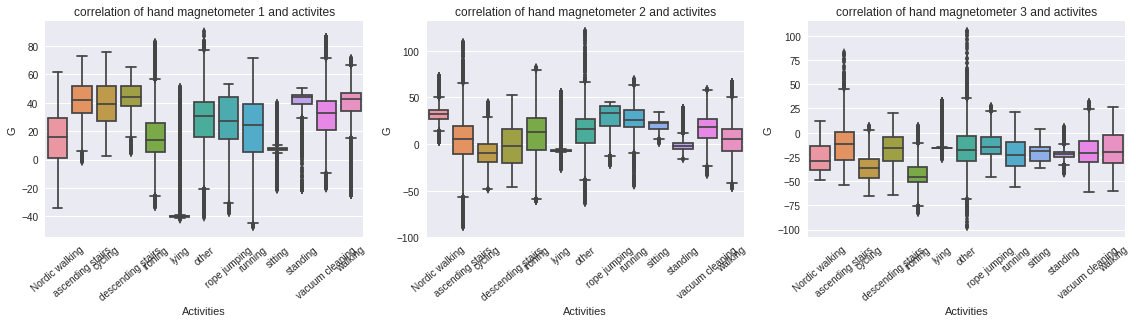

In [0]:
box_plot('IMU_hand2_ACC16','IMU_hand3_ACC16','IMU_hand4_AAC16','ACC16','correlation of hand accelerometer x and activites','correlation of hand accelerometer y and activites','correlation of hand accelerometer z and activites')
box_plot('IMU_hand11_M','IMU_hand12_M','IMU_hand13_M','G',
         'correlation of hand magnetometer 1 and activites','correlation of hand magnetometer 2 and activites','correlation of hand magnetometer 3 and activites')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


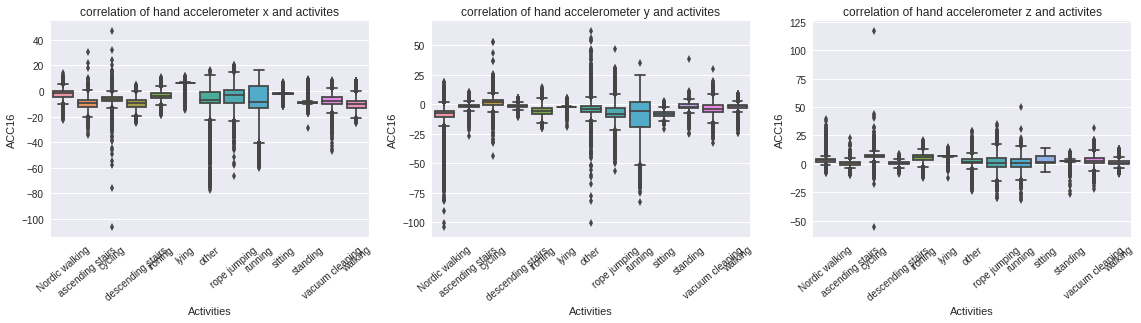

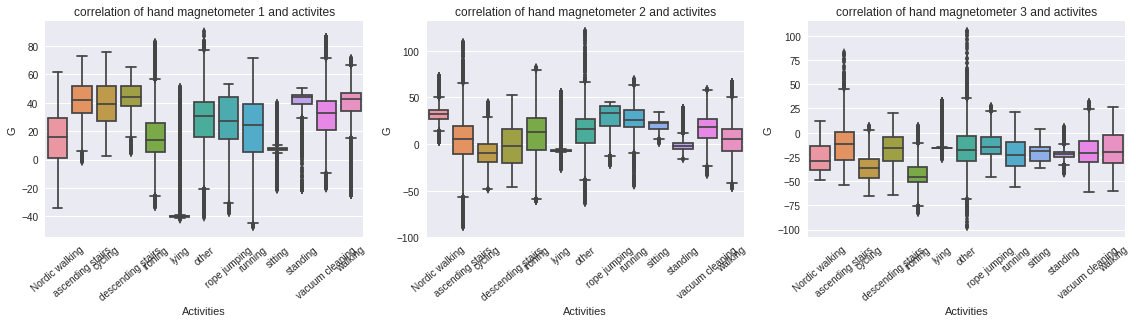

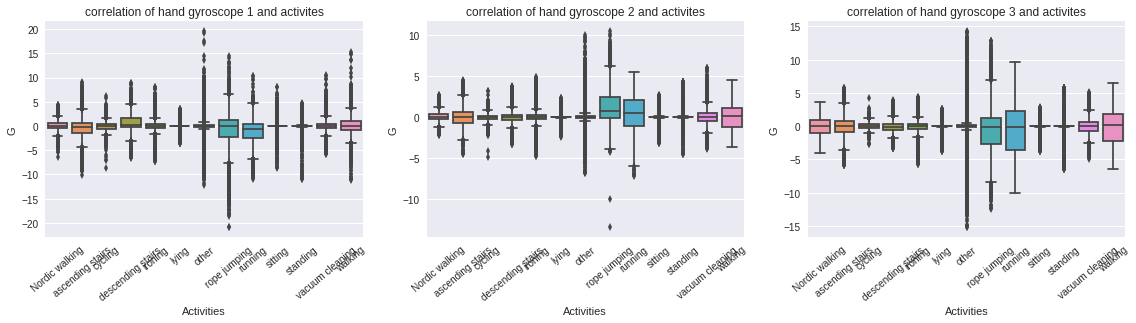

In [0]:
box_plot('IMU_hand2_ACC16','IMU_hand3_ACC16','IMU_hand4_ACC16','ACC16','correlation of hand accelerometer x and activites','correlation of hand accelerometer y and activites','correlation of hand accelerometer z and activites')
box_plot('IMU_hand11_M','IMU_hand12_M','IMU_hand13_M','G',
         'correlation of hand magnetometer 1 and activites','correlation of hand magnetometer 2 and activites','correlation of hand magnetometer 3 and activites')
box_plot('IMU_hand8_G','IMU_hand9_G','IMU_hand10_G','G',
         'correlation of hand gyroscope 1 and activites','correlation of hand gyroscope 2 and activites','correlation of hand gyroscope 3 and activites')

According to the above box plot

### 4.6 Correlation of IMU chest and activites

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


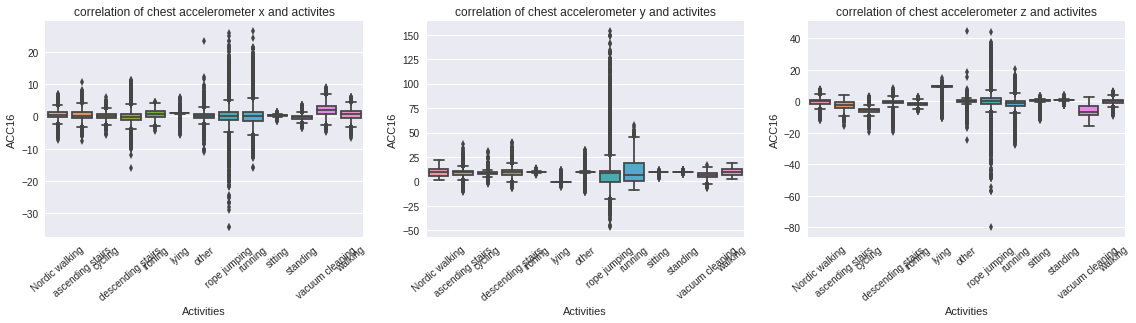

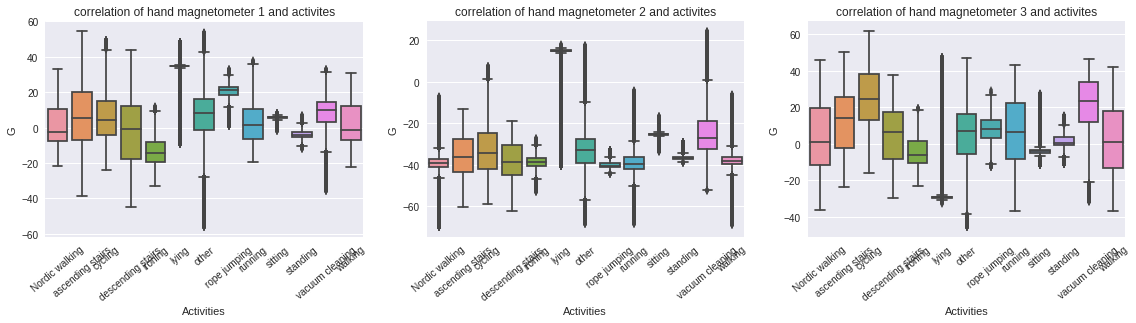

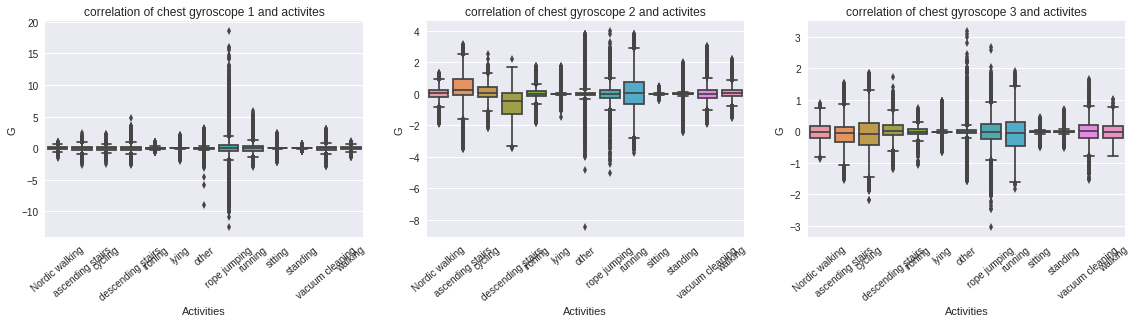

In [0]:
box_plot('IMU_chest2_ACC16','IMU_chest3_ACC16','IMU_chest4_ACC16','ACC16',
         'correlation of chest accelerometer x and activites','correlation of chest accelerometer y and activites','correlation of chest accelerometer z and activites')
box_plot('IMU_chest11_M','IMU_chest12_M','IMU_chest13_M','G',
         'correlation of hand magnetometer 1 and activites','correlation of hand magnetometer 2 and activites','correlation of hand magnetometer 3 and activites')
box_plot('IMU_chest8_G','IMU_chest9_G','IMU_chest10_G','G',
         'correlation of chest gyroscope 1 and activites','correlation of chest gyroscope 2 and activites','correlation of chest gyroscope 3 and activites')

### 4.7  Correlation of IMU ankle and activites

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


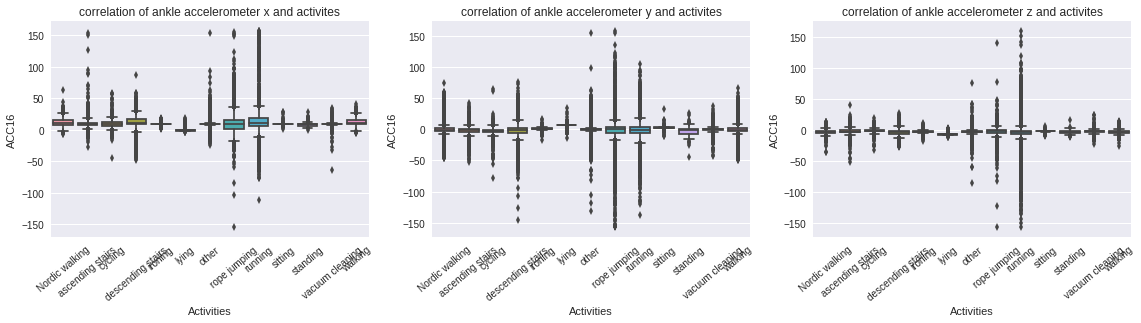

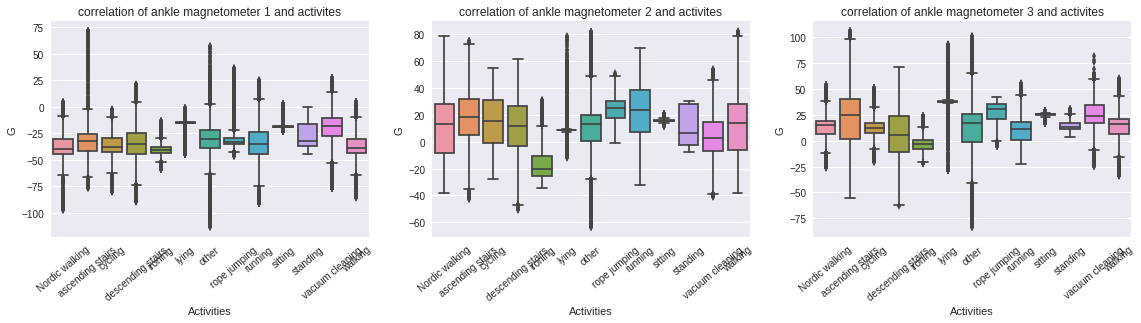

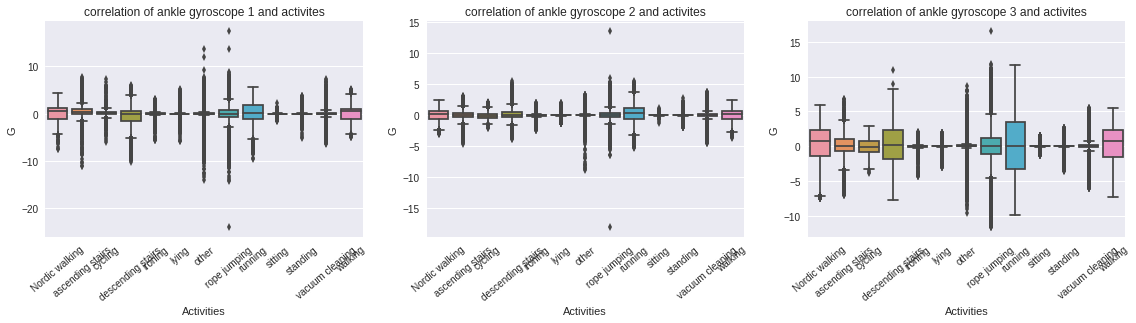

In [0]:
box_plot('IMU_ankle2_ACC16','IMU_ankle3_ACC16','IMU_ankle4_ACC16','ACC16',
         'correlation of ankle accelerometer x and activites','correlation of ankle accelerometer y and activites','correlation of ankle accelerometer z and activites')
box_plot('IMU_ankle11_M','IMU_ankle12_M','IMU_ankle13_M','G',
         'correlation of ankle magnetometer 1 and activites','correlation of ankle magnetometer 2 and activites','correlation of ankle magnetometer 3 and activites')
box_plot('IMU_ankle8_G','IMU_ankle9_G','IMU_ankle10_G','G',
         'correlation of ankle gyroscope 1 and activites','correlation of ankle gyroscope 2 and activites','correlation of ankle gyroscope 3 and activites')

###  4.8 hypothesis testing  

In [0]:
datedds.shape

(408030, 42)

Text(0,0.5,'frequency')

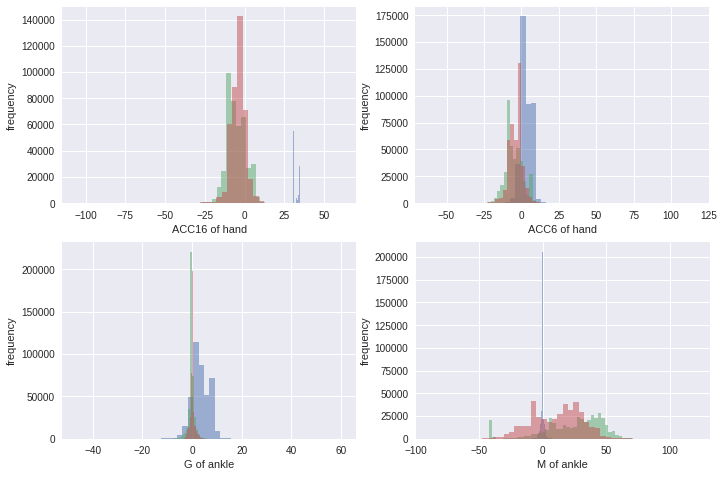

In [0]:
plt.figure(figsize=(3,2))
plt.subplots_adjust(2,2,5,5)

plt.subplot(221)
for name_c in datedds.columns[3:6]:
  datedds[name_c].hist(bins=50,alpha=0.5)
  #dat0.price.plot(kind="hist",color='lightblue')
plt.xlabel("ACC16 of hand")
plt.ylabel("frequency")

plt.subplot(222)
for name_c in datedds.columns[6:9]:
  datedds[name_c].hist(bins=50,alpha=0.5)
#dat0.price.plot(kind="hist",color='lightblue')
plt.xlabel("ACC6 of hand")
plt.ylabel("frequency")

plt.subplot(223)
for name_c in datedds.columns[9:12]:
  datedds[name_c].hist(bins=50,alpha=0.5)
#dat0.price.plot(kind="hist",color='lightblue')
plt.xlabel("G of ankle")
plt.ylabel("frequency")


plt.subplot(224)
for name_c in datedds.columns[12:15]:
  datedds[name_c].hist(bins=50,alpha=0.5)
#dat0.price.plot(kind="hist",color='lightblue')
plt.xlabel("M of ankle")
plt.ylabel("frequency")

In [0]:
for names in dat01.columns[3:16]:
  print('P -values of '+names+' and activities : ',names,sm.stats.anova_lm(ols(names+'~ C(activityID)',data=dat01).fit())._values[0][4])

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


P -values of IMU_hand1_C and activities :  IMU_hand1_C 0.0
P -values of IMU_hand2_ACC16 and activities :  IMU_hand2_ACC16 3.083e-321
P -values of IMU_hand3_ACC16 and activities :  IMU_hand3_ACC16 1.6713452985947508e-233
P -values of IMU_hand4_AAC16 and activities :  IMU_hand4_AAC16 2.009738957152427e-253
P -values of IMU_hand5_ACC6 and activities :  IMU_hand5_ACC6 9.17e-321
P -values of IMU_hand6_ACC6 and activities :  IMU_hand6_ACC6 5.533948637608934e-234
P -values of IMU_hand7_ACC6 and activities :  IMU_hand7_ACC6 2.3786379741527784e-262
P -values of IMU_hand8_G and activities :  IMU_hand8_G 1.9658942407539815e-52
P -values of IMU_hand9_G and activities :  IMU_hand9_G 3.194939200443176e-72
P -values of IMU_hand10_G and activities :  IMU_hand10_G 0.6042652948270444
P -values of IMU_hand11_M and activities :  IMU_hand11_M 0.0
P -values of IMU_hand12_M and activities :  IMU_hand12_M 0.0
P -values of IMU_hand13_M and activities :  IMU_hand13_M 3.5586103234763675e-266


### 4.9 Modelling  

#### training data set and test data set

In [0]:
import sklearn.model_selection as cross_validation

In [0]:
read_data=copy_simple.heart_rate[ ~ copy_simple.heart_rate.str.contains('NaN')]

In [0]:
# datA=copy_simple1.drop(['heart_rate'], axis=1)

# dat02=datA[ ~ datA['IMU_hand2_ACC16'].str.contains('NaN')]


# data=dat02[['IMU_chest1_C','mean_acc6_chest','mean_m_chest','mean_acc16_chest']]

# data=dat02.drop(['activityID','mean_acc6_chest','mean_g_chest','mean_m_chest','mean_acc16_chest'], axis=1)

In [0]:
datA=copy_simple1.drop(['heart_rate'], axis=1)
dat02=datA
print(len(dat02))
for i in dat02.columns[2:]:

  dat02=dat02[ ~ dat02[i].str.contains('NaN')]
  
print(len(dat02))

408031
402838


In [0]:
data=datedds.drop(['activityID','timestamp'], axis=1)
target = datedds['activityID']

In [0]:
a=pd.isna(data.IMU_hand2_ACC16)

In [0]:
for i in range(len(a)):
  if a[i]== True:
    print(i)
    break

In [0]:
train_data,test_data,train_target,test_target = cross_validation.train_test_split(data,target,test_size=0.4,train_size=0.6,random_state=12345)

#### model training

In [0]:
import sklearn.tree as tree

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=2)
clf.fit(train_data,train_target)

# prediction of result of Classifier model
train_est = clf.predict(train_data)  #  Using the model to predict the results of the training set
train_est_p=clf.predict_proba(train_data)[:,1]  #Predicting the probability of a training set with a model


test_est=clf.predict(test_data)  #  Predicting the results of the test set with the model
test_est_p=clf.predict_proba(test_data)[:,1]  #  Predicting the probability of a test set with a model
pd.DataFrame({'test_target':test_target,'test_est':test_est,'test_est_p':test_est_p}).T

,93501,161328,112935,351455,325973,178773,49643,246079,302480,140268,...,271292,211249,300312,389586,177200,280739,106811,174777,229283,180388
test_est,ironing,other,ironing,running,walking,walking,ironing,walking,walking,walking,...,other,running,other,other,other,other,ironing,other,walking,other
test_est_p,0.00157114,0.000597566,0.00157114,0.223556,0.00262646,0.00262646,0.00157114,0.00262646,0.00262646,0.00262646,...,0.000597566,0.223556,0.000597566,0.000597566,0.000597566,0.000597566,0.00157114,0.000597566,0.00262646,0.000597566
test_target,ironing,other,ironing,running,Nordic walking,other,sitting,walking,cycling,vacuum cleaning,...,other,other,cycling,other,other,cycling,ironing,other,walking,other


In [0]:
train_est = clf.predict(train_data)

In [0]:
import sklearn.metrics as metrics

#### Analysis of model result

In [0]:
print(metrics.confusion_matrix(test_target,test_est))
print(metrics.classification_report(test_target,test_est))
print(pd.DataFrame(list(zip(data.columns,clf.feature_importances_))))

[[    0     0     0     0     0     0   315     0     0     0     0     0
  11094]
 [    0     0     0     0    67     0    47     0  4449     0     0     0
     97]
 [    0     0     0     0     0     0  9846     0    48     0     0     0
    420]
 [    0     0     0     0     0     0    38     0  3786     0     0     0
    134]
 [    0     0     0     0 13190     0     0     0     0     0     0     0
      0]
 [    0     0     0     0  9607     0     0     0     0     0     0     0
      0]
 [    0     0     0     0   918     0 53546     0  1983     0     0     0
   2025]
 [    0     0     0     0     0     0    48     0  3510     0     0     0
      0]
 [    0     0     0     0     0     0    19     0  6595     0     0     0
     71]
 [    0     0     0     0  9136     0     0     0     0     0     0     0
      0]
 [    0     0     0     0 10041     0     0     0     0     0     0     0
      8]
 [    0     0     0     0   111     0     0     0     0     0     0     0
   9470]
 [  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                   precision    recall  f1-score   support

   Nordic walking       0.00      0.00      0.00     11409
 ascending stairs       0.00      0.00      0.00      4660
          cycling       0.00      0.00      0.00     10314
descending stairs       0.00      0.00      0.00      3958
          ironing       0.31      1.00      0.47     13190
            lying       0.00      0.00      0.00      9607
            other       0.84      0.92      0.88     58472
     rope jumping       0.00      0.00      0.00      3558
          running       0.32      0.99      0.49      6685
          sitting       0.00      0.00      0.00      9136
         standing       0.00      0.00      0.00     10049
  vacuum cleaning       0.00      0.00      0.00      9581
          walking       0.35      1.00      0.52     12593

        micro avg       0.53      0.53      0.53    163212
        macro avg       0.14      0.30      0.18    163212
     weighted avg       0.37      0.53      0.41    16

In [0]:
from sklearn.metrics import classification_report
predict_y = clf.predict(test_data)
print(classification_report(test_target, predict_y))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                   precision    recall  f1-score   support

   Nordic walking       0.00      0.00      0.00     11409
 ascending stairs       0.00      0.00      0.00      4660
          cycling       0.00      0.00      0.00     10314
descending stairs       0.00      0.00      0.00      3958
          ironing       0.31      1.00      0.47     13190
            lying       0.00      0.00      0.00      9607
            other       0.84      0.92      0.88     58472
     rope jumping       0.00      0.00      0.00      3558
          running       0.32      0.99      0.49      6685
          sitting       0.00      0.00      0.00      9136
         standing       0.00      0.00      0.00     10049
  vacuum cleaning       0.00      0.00      0.00      9581
          walking       0.35      1.00      0.52     12593

        micro avg       0.53      0.53      0.53    163212
        macro avg       0.14      0.30      0.18    163212
     weighted avg       0.37      0.53      0.41    16

In [0]:
# fpr_test, tpr_test, th_test = metrics.roc_curve(test_target, test_est_p)
# fpr_train, tpr_train, th_train = metrics.roc_curve(train_target, train_est_p)
# plt.figure(figsize=[6,6])
# plt.plot(fpr_test, tpr_test)
# plt.plot(fpr_train, tpr_train)
# plt.title('ROC curve')
# plt.show()
# #%%
# print('AUC = %6.4f' %metrics.auc(fpr_test, tpr_test))

#### optimization model

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [0]:
param_grid={'max_depth':[12,14],
           'min_samples_split':[4,8,12]}
clf = tree.DecisionTreeClassifier(criterion='entropy')
clfcv = GridSearchCV(estimator=clf, param_grid=param_grid,cv=4)
clfcv.fit(train_data, train_target)

GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [12, 14], 'min_samples_split': [4, 8, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print(clfcv.best_params_)
print(clfcv.best_score_)

{'max_depth': 12, 'min_samples_split': 4}
0.9987664305729154


In [0]:
from sklearn.metrics import classification_report

predict_y = clfcv.predict(test_data)
print(classification_report(test_target, predict_y))

                   precision    recall  f1-score   support

   Nordic walking       1.00      1.00      1.00     11409
 ascending stairs       1.00      1.00      1.00      4660
          cycling       1.00      1.00      1.00     10314
descending stairs       1.00      1.00      1.00      3958
          ironing       1.00      1.00      1.00     13190
            lying       1.00      1.00      1.00      9607
            other       1.00      1.00      1.00     58472
     rope jumping       1.00      1.00      1.00      3558
          running       1.00      1.00      1.00      6685
          sitting       1.00      1.00      1.00      9136
         standing       1.00      1.00      1.00     10049
  vacuum cleaning       1.00      1.00      1.00      9581
          walking       1.00      1.00      1.00     12593

        micro avg       1.00      1.00      1.00    163212
        macro avg       1.00      1.00      1.00    163212
     weighted avg       1.00      1.00      1.00    16

####  Second scenario KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier as kNN
neigh = kNN(n_neighbors=3, algorithm='auto', weights='distance', n_jobs=1)
neigh.fit(train_data, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')

In [0]:
neigh.score

<bound method ClassifierMixin.score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='distance')>

In [0]:
predict_y = neigh.predict(test_data)
print(classification_report(test_target, predict_y))

                   precision    recall  f1-score   support

   Nordic walking       1.00      1.00      1.00     11409
 ascending stairs       0.99      0.99      0.99      4660
          cycling       1.00      1.00      1.00     10314
descending stairs       0.99      0.98      0.98      3958
          ironing       1.00      1.00      1.00     13190
            lying       1.00      1.00      1.00      9607
            other       1.00      0.99      0.99     58472
     rope jumping       1.00      1.00      1.00      3558
          running       1.00      1.00      1.00      6685
          sitting       1.00      1.00      1.00      9136
         standing       1.00      1.00      1.00     10049
  vacuum cleaning       1.00      1.00      1.00      9581
          walking       0.98      1.00      0.99     12593

        micro avg       1.00      1.00      1.00    163212
        macro avg       1.00      1.00      1.00    163212
     weighted avg       1.00      1.00      1.00    16

### Two model comparison

In [0]:
import sklearn.ensemble as ensemble

In [0]:
#random forest
# param_grid={
#     'criterion':['entropy','gini'],
#     'max_depth':[5,6,7,8],
#     'n_estimators':[11,13,15],
#     'max_features':[0.3,0.4,0.5,0.6],
#     'min_samples_split':[4,8,12,16]
# }


# param_grid={
#     'criterion':['entropy'],
#     'max_depth':[7,8],
#     'n_estimators':[11,13,15],
#     'max_features':[0.3,0.4,0.5],
#     'min_samples_split':[4]
# }
# rfc=ensemble.RandomForestClassifier()
# rfccv=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=4)
# rfccv.fit(train_data, train_target)



In [0]:
predict_s=rfccv.predict(data)

In [0]:
print(classification_report(target, predict_s))

## 5. Data product building for other user

In [0]:
def predict_T_activities(data_user):
  data_user1=fill_mis(data_user)
  data_user1=data_user1.interpolate(method='values')
  predict_temp=lm1.predict(data_user)
  predict_act_knn = neigh.predict(data_user.drop(['activityID','timestamp'], axis=1))
  predict_activities_= clfcv.predict(data_user.drop(['activityID','timestamp'], axis=1))
  
  print('Users hand temperature:',predict_temp)
  print('Users Activity category:',predict_activities)
  

In [0]:
data_user1=fill_mis(copy_simple01)
data_user1=data_user1.interpolate(method='values')
predict_temp=lm1.predict(data_user1)
# predict_act_knn = neigh.predict(data_user.drop(['activityID','timestamp'], axis=1))
predict_activities_= clfcv.predict(data_user1.drop(['activityID','timestamp'], axis=1))

In [0]:
print(classification_report(data_user1['activityID'], predict_activities_))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                   precision    recall  f1-score   support

   Nordic walking       0.00      0.00      0.00     20265
 ascending stairs       0.14      0.94      0.25     15890
          cycling       0.96      0.70      0.81     23575
descending stairs       0.43      0.01      0.02     14899
          ironing       0.00      0.00      0.00     23573
            lying       0.93      0.92      0.92     27187
            other       0.47      0.45      0.46    126459
     rope jumping       0.05      0.03      0.03     12912
          running       0.24      0.00      0.00     21265
          sitting       0.00      0.00      0.00     23480
         standing       0.00      0.00      0.00     21717
  vacuum cleaning       0.00      0.00      0.00     22941
          walking       0.20      0.68      0.31     22253

        micro avg       0.34      0.34      0.34    376416
        macro avg       0.26      0.29      0.22    376416
     weighted avg       0.33      0.34      0.30    37

In [0]:
data_user1.head()

,timestamp,activityID,heart_rate,IMU_hand1_C,IMU_hand2_ACC16,IMU_hand3_ACC16,IMU_hand4_AAC16,IMU_hand5_ACC6,IMU_hand6_ACC6,IMU_hand7_ACC6,...,IMU_ankle8_G,IMU_ankle9_G,IMU_ankle10_G,IMU_ankle11_M,IMU_ankle12_M,IMU_ankle13_M,IMU ankle14,IMU ankle15,IMU ankle16,IMU ankle17
0,8.39,other,127.998614,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.006577,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0
1,8.40,other,127.998614,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.003014,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0
2,8.41,other,127.998614,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,0.003175,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0
3,8.42,other,127.998614,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,0.012698,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0
4,8.43,other,127.998614,30.0,2.29959,8.82929,3.54710,2.26132,8.65762,3.77788,...,-0.006089,-0.016024,0.001050,-60.2954,-38.8778,-58.3977,1.0,0.0,0.0,0.0


In [0]:
print(predict_temp[:10],predict_activities_[:10])

0    33.511366
1    33.518177
2    33.521914
3    33.501646
4    33.508862
5    33.505814
6    33.513965
7    33.520298
8    33.529386
9    33.950470
dtype: float64 ['Nordic walking' 'Nordic walking' 'Nordic walking' 'Nordic walking'
 'Nordic walking' 'Nordic walking' 'Nordic walking' 'Nordic walking'
 'Nordic walking' 'other']


## 3.Correlation of 3D-acceleration  (continuous variables) and  orthr  variables -linear model and determine the amount of physical activity
  
  hypothesis testing  
  
  Modelling machine learning linear Regression   
  
  Generative model
  Training data 
  Model testing

$acceleration = \sqrt[2]{x^2+y^2+z^2}$

$kcal=kg * time * (30/velocity)$

### 3.1Analysis of temperature distribution

In [0]:
datedds['acc_hand']=(datedds.IMU_hand2_ACC16**2+datedds.IMU_hand3_ACC16**2+datedds.IMU_hand4_ACC16**2)**0.5
datedds['acc_chest']=(datedds.IMU_chest2_ACC16**2+datedds.IMU_chest3_ACC16**2+datedds.IMU_chest4_ACC16**2)**0.5
datedds['acc_ankle']=(datedds.IMU_ankle2_ACC16**2+datedds.IMU_ankle3_ACC16**2+datedds.IMU_ankle4_ACC16**2)**0.5

In [0]:
datedds['kcal_hand']=87*0.01*(30/datedds['acc_hand']*0.01)
datedds['kcal_chest']=87*0.01*(30/datedds['acc_chest']*0.01)
datedds['kcal_ankle']=87*0.01*(30/datedds['acc_ankle']*0.01)

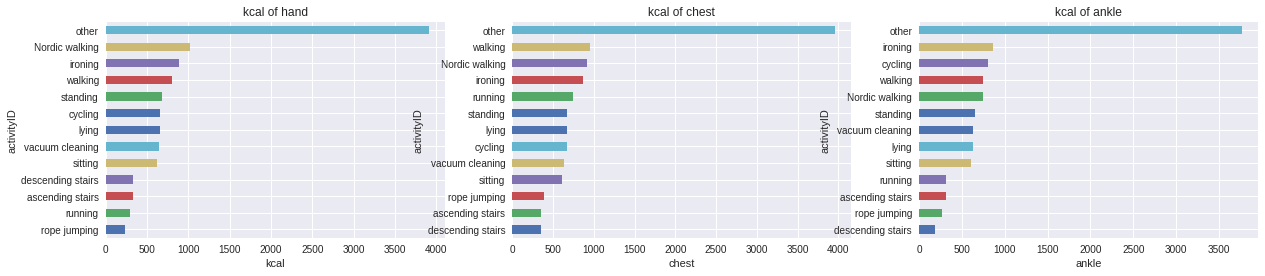

In [0]:
plt.figure(figsize=(4,3))
plt.subplots_adjust(1,1,5,2)
plt.subplot(131)
plt.title('kcal of hand')
plt.xlabel('kcal')
copy_simple1['kcal_hand'].astype(float).groupby(copy_simple1.activityID).sum().sort_values(ascending=True).plot(kind='barh')

plt.subplot(132)
plt.title('kcal of chest')
plt.xlabel('chest')
copy_simple1['kcal_chest'].astype(float).groupby(copy_simple1.activityID).sum().sort_values(ascending=True).plot(kind='barh')

plt.subplot(133)
plt.title('kcal of ankle')
plt.xlabel('ankle')
copy_simple1['kcal_ankle'].astype(float).groupby(copy_simple1.activityID).sum().sort_values(ascending=True).plot(kind='barh')

In [0]:
datedds

def cal_vol(data):
  acc_da=data['acc_hand'].values
  time_da=data['timestamp'].values
  speed=0
  vo=[]
  for acc in range (len(acc_da)-1):
    dis=speed+acc_da[acc]*(time_da[acc+1]-time_da[acc])
    vo.append(dis)
  return vo

Text(0.5,1,'Acceleration  of ankle')

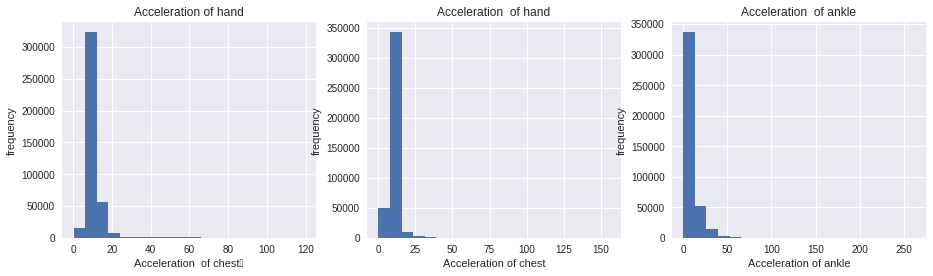

In [0]:
# dependent

plt.figure(figsize=(4,3))
plt.subplots_adjust(2,1,5,2)

plt.subplot(131)


datedds.acc_hand.hist(bins=20)
#dat0.price.plot(kind="hist",color='lightblue')
plt.xlabel("Acceleration  of chest）")
plt.ylabel("frequency")
plt.title('Acceleration of hand')
plt.subplot(132)
datedds.acc_chest.hist(bins=20)
#dat0.price.plot(kind="hist",color='lightblue')
plt.xlabel("Acceleration of chest")
plt.ylabel("frequency")
plt.title('Acceleration  of hand')
plt.subplot(133)
datedds.acc_ankle.hist(bins=20)
#dat0.price.plot(kind="hist",color='lightblue')
plt.xlabel("Acceleration of ankle")
plt.ylabel("frequency")
plt.title('Acceleration  of ankle')

### 3.2 Compuating value counts of each activities

### 3.3 Average of acceleration data

In [0]:
copy_simple1=datedds

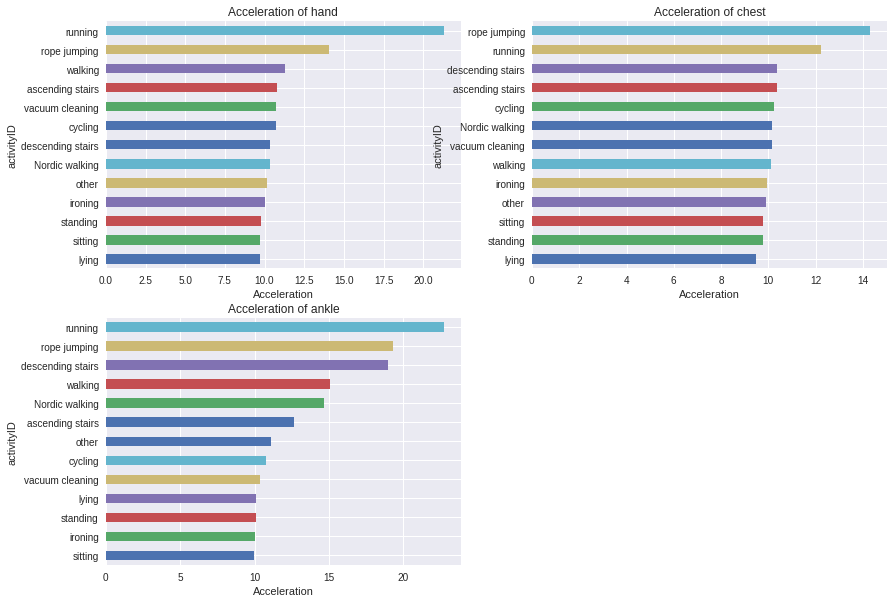

In [0]:
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.title('Acceleration of hand')
plt.xlabel('Acceleration')
copy_simple1['acc_hand'].astype(float).groupby(copy_simple1.activityID).mean().sort_values(ascending=True).plot(kind='barh')
plt.subplot(222)
plt.title('Acceleration of chest')
plt.xlabel('Acceleration')
copy_simple1['acc_chest'].astype(float).groupby(copy_simple1.activityID).mean().sort_values(ascending=True).plot(kind='barh')
plt.subplot(223)
plt.title('Acceleration of ankle')
plt.xlabel('Acceleration')
copy_simple1['acc_ankle'].astype(float).groupby(copy_simple1.activityID).mean().sort_values(ascending=True).plot(kind='barh')

### 3.4 Avarage box plot of activities and temperature

In [0]:
def box_plot(name1,name2,name3,name4,titlename1,titlename2,titlename3):
  plt.figure(figsize=(5,3))
  plt.subplots_adjust(2,1,5,2)
  plt.subplot(131)
  dat1=datedds[['activityID',name1]]
  dat1.activityID=dat1.activityID.astype("category")
  plt.xticks(rotation=40)
  sns.boxplot(x='activityID',y=name1,data=dat1)
  plt.ylabel(name4)
  plt.xlabel('Activities')
#   plt.title('Activities and Temperature of chest')
  plt.title(titlename1)

  plt.subplot(132)
  dat1=datedds[['activityID',name2]]
  dat1.activityID=dat1.activityID.astype("category")
  plt.xticks(rotation=40)
  sns.boxplot(x='activityID',y=name2,data=dat1)
  plt.ylabel(name4)
  plt.xlabel('Activities')
#   plt.title('Activities and Temperature of hand')
  plt.title(titlename2)

  plt.subplot(133)
  dat1=datedds[['activityID',name3]]
  dat1.activityID=dat1.activityID.astype("category")
  plt.xticks(rotation=40)
  sns.boxplot(x='activityID',y=name3,data=dat1)
  plt.ylabel(name4)
  plt.xlabel('Activities')
#   plt.title('Activities and Temperature of ankle')
  plt.title(titlename3)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


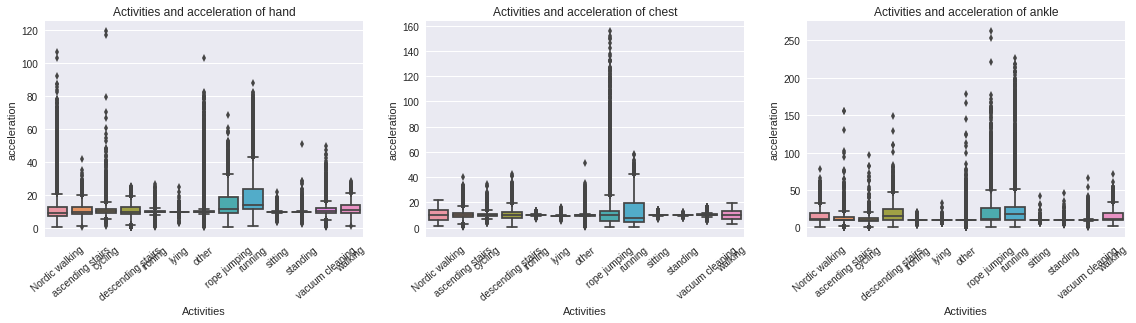

In [0]:
box_plot('acc_hand','acc_chest','acc_ankle','acceleration','Activities and acceleration of hand','Activities and acceleration of chest','Activities and acceleration of ankle')

In [0]:
print('Information of acceleration of hand\n',datedds.acc_hand.agg(['mean','median','std']))
print('Information of acceleration of chest\n',datedds.acc_chest.agg(['mean','median','std']))
print('Information of acceleration of ankle\n',datedds.acc_ankle.agg(['mean','median','std']))

Information of acceleration of hand
 mean      10.799796
median     9.770320
std        5.076812
Name: acc_hand, dtype: float64
Information of acceleration of chest
 mean      10.152660
median     9.794380
std        4.058729
Name: acc_chest, dtype: float64
Information of acceleration of ankle
 mean      12.198942
median    10.045877
std        7.752084
Name: acc_ankle, dtype: float64


In [0]:
print('Information of acceleration of hand\n',datedds.acc_hand.quantile([0.25,0.5,0.75]))
print('Information of acceleration of chest\n',datedds.acc_chest.quantile([0.25,0.5,0.75]))
print('Information of acceleration of ankle\n',datedds.acc_ankle.quantile([0.25,0.5,0.75]))

Information of acceleration of hand
 0.25     9.489320
0.50     9.770320
0.75    10.878935
Name: acc_hand, dtype: float64
Information of acceleration of chest
 0.25     9.487395
0.50     9.794380
0.75    10.195193
Name: acc_chest, dtype: float64
Information of acceleration of ankle
 0.25     9.914802
0.50    10.045877
0.75    10.996065
Name: acc_ankle, dtype: float64


In [0]:
# #independent variable
# print('Activities:')
# print(datedds.activityID.agg(['min','mean','median','max','std']).T)

constant 

In [0]:
datedd.columns

Index(['timestamp', 'activityID', 'heart_rate', 'IMU_hand1_C',
       'IMU_hand2_ACC16', 'IMU_hand3_ACC16', 'IMU_hand4_AAC16',
       'IMU_hand5_ACC6', 'IMU_hand6_ACC6', 'IMU_hand7_ACC6', 'IMU_hand8_G',
       'IMU_hand9_G', 'IMU_hand10_G', 'IMU_hand11_M', 'IMU_hand12_M',
       'IMU_hand13_M', 'IMU_chest1_C', 'IMU_chest2_ACC16', 'IMU_chest3_ACC16',
       'IMU_chest4_ACC16', 'IMU_chest5_ACC6', 'IMU_chest6_ACC6',
       'IMU_chest7_ACC6', 'IMU_chest8_G', 'IMU_chest9_G', 'IMU_chest10_G',
       'IMU_chest11_M', 'IMU_chest12_M', 'IMU_chest13_M', 'IMU_ankle1_C',
       'IMU_ankle2_ACC16', 'IMU_ankle3_ACC16', 'IMU_ankle4_ACC16',
       'IMU_ankle5_ACC6', 'IMU ankle6_ACC6', 'IMU_ankle7_ACC6', 'IMU_ankle8_G',
       'IMU_ankle9_G', 'IMU_ankle10_G', 'IMU_ankle11_M', 'IMU_ankle12_M',
       'IMU_ankle13_M'],
      dtype='object')

### 3.5  Distribution  of acceleration and oter variables

In [0]:
def plot_scatter(name1,name2,name3):
  plt.figure(figsize=(5,3))
  plt.subplots_adjust(2,1,5,2)
  plt.subplot(131)
  plt.scatter(datedds['acc_hand'],datedds[name1],marker='.')
  plt.ylabel(name1)
  plt.xlabel('3D-acceleration')
  plt.title('Correlation of 3D-acceleration of hand and '+name1)

  plt.subplot(132)
  plt.scatter(datedds['acc_chest'],datedds[name2],marker='.')
  plt.ylabel(name2)
  plt.xlabel('3D-acceleration')
  plt.title('Correlation of 3D-acceleration of chest and '+name2)

  plt.subplot(133)
  plt.scatter(datedds['acc_ankle'],datedds[name3],marker='.')
  plt.ylabel(name3)
  plt.xlabel('3D-acceleration')
  plt.title('Correlation of 3D-acceleration of ankle and '+name3)


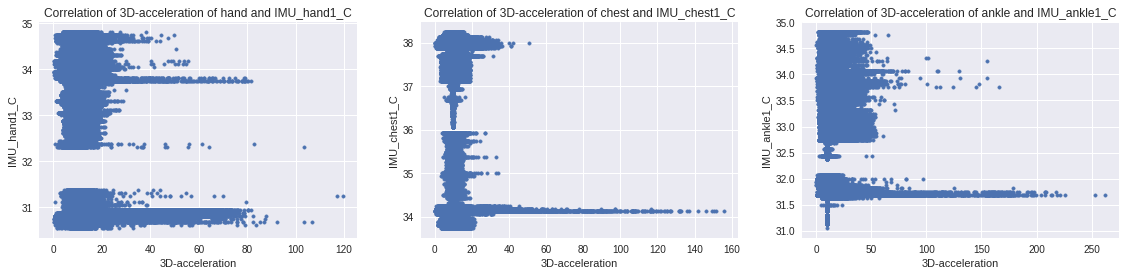

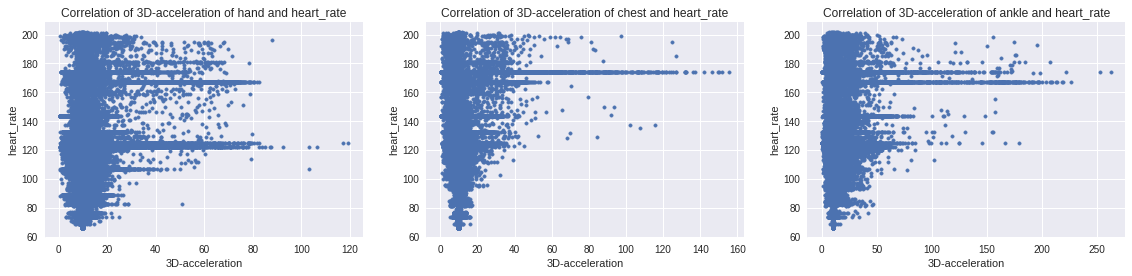

In [0]:
plot_scatter('IMU_hand1_C','IMU_chest1_C','IMU_ankle1_C')
plot_scatter('heart_rate','heart_rate','heart_rate')

### 3.6 Pearson product-moment correlation coefficient of IMU data

In [0]:
datedd[datedd.columns[4:10]].corr(method='pearson')

,IMU_hand2_ACC16,IMU_hand3_ACC16,IMU_hand4_AAC16,IMU_hand5_ACC6,IMU_hand6_ACC6,IMU_hand7_ACC6
IMU_hand2_ACC16,1.000000,-0.056273,0.339240,0.987165,-0.060993,0.349516
IMU_hand3_ACC16,-0.056273,1.000000,0.065133,-0.056279,0.964188,0.073282
IMU_hand4_AAC16,0.339240,0.065133,1.000000,0.333829,0.073893,0.973637
IMU_hand5_ACC6,0.987165,-0.056279,0.333829,1.000000,-0.050650,0.344276
IMU_hand6_ACC6,-0.060993,0.964188,0.073893,-0.050650,1.000000,0.069950
IMU_hand7_ACC6,0.349516,0.073282,0.973637,0.344276,0.069950,1.000000


In [0]:
datedd[datedd.columns[18:23]].corr(method='pearson')

,IMU_chest3_ACC16,IMU_chest4_ACC16,IMU_chest5_ACC6,IMU_chest6_ACC6,IMU_chest7_ACC6
IMU_chest3_ACC16,1.000000,-0.183081,-0.040897,0.963088,-0.156324
IMU_chest4_ACC16,-0.183081,1.000000,-0.041650,-0.218036,0.961002
IMU_chest5_ACC6,-0.040897,-0.041650,1.000000,-0.016365,-0.078580
IMU_chest6_ACC6,0.963088,-0.218036,-0.016365,1.000000,-0.194590
IMU_chest7_ACC6,-0.156324,0.961002,-0.078580,-0.194590,1.000000


### 3.7 Hypothesis testing

In [0]:
datedk=datedds.dropna()

In [0]:
dat01=get_sample(datedk,sampling="stratified", k=300, stratified_col=['activityID'])

In [0]:
dat01=dat01.dropna()

In [0]:
dat01['ln_hand_C']=np.log(dat01['IMU_hand1_C'])

In [0]:
from scipy import stats

In [0]:
print(stats.ttest_ind(dat01['IMU_hand2_ACC16'].values,dat01['IMU_hand5_ACC6'].values))
print(stats.ttest_ind(dat01['IMU_hand3_ACC16'].values,dat01['IMU_hand6_ACC6'].values))
print(stats.ttest_ind(dat01['IMU_hand4_ACC16'].values,dat01['IMU_hand7_ACC6'].values))

Ttest_indResult(statistic=-0.3879390296826983, pvalue=0.6980717431263206)
Ttest_indResult(statistic=0.27355160020341396, pvalue=0.7844364776998102)
Ttest_indResult(statistic=-2.5062270656045427, pvalue=0.012222921115637659)


In [0]:
print(stats.ttest_ind(dat01['acc_hand'].values,dat01['heart_rate'].values))
print(stats.ttest_ind(dat01['acc_chest'].values,dat01['heart_rate'].values))
print(stats.ttest_ind(dat01['acc_ankle'].values,dat01['heart_rate'].values))

Ttest_indResult(statistic=-208.80786618319988, pvalue=0.0)
Ttest_indResult(statistic=-210.26341503307833, pvalue=0.0)
Ttest_indResult(statistic=-198.07540084110508, pvalue=0.0)


In [0]:
# print('P values of acc_hand',sm.stats.anova_lm(ols('acc_hand~ IMU_hand8_G',data=dat01).fit())._values[0][4])
# print('P values of',sm.stats.anova_lm(ols('acc_hand~ IMU_hand9_G',data=dat01).fit())._values[0][4])
# print('P values of',sm.stats.anova_lm(ols('acc_hand~ IMU_hand10_G',data=dat01).fit())._values[0][4])

P values of 4.557199890207357e-56
P values of 1.6657779795368581e-37
P values of 0.009409469463383117


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [0]:
print("dist P values of acc_hand~ C(activityID):%.4f" %sm.stats.anova_lm(ols('IMU_chest1_C~ C(activityID)',data=dat01).fit())._values[0][4])
print("dist P values of acc_chest~ C(activityID):%.4f " %sm.stats.anova_lm(ols('IMU_ankle1_C~ C(activityID)',data=dat01).fit())._values[0][4])
print("dist P values of acc_ankle~ C(activityID):%.4f " %sm.stats.anova_lm(ols('IMU_hand1_C~ C(activityID)',data=dat01).fit())._values[0][4])

dist P values of acc_hand~ C(activityID):0.0000
dist P values of acc_chest~ C(activityID):0.0000 
dist P values of acc_ankle~ C(activityID):0.0000 


/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


### 3.8 Modeling

In [0]:
myss=''
for nam in datedk.columns[2:3]:
  myss=myss+'+'+nam
for nam in datedk.columns[4:16]:
  myss=myss+'+'+nam
myss

'+heart_rate+IMU_hand2_ACC16+IMU_hand3_ACC16+IMU_hand4_ACC16+IMU_hand5_ACC6+IMU_hand6_ACC6+IMU_hand7_ACC6+IMU_hand8_G+IMU_hand9_G+IMU_hand10_G+IMU_hand11_M+IMU_hand12_M+IMU_hand13_M'

In [0]:
myss=''
for nam in datedk.columns[4:7]:
  myss=myss+'+'+nam
myss

'+IMU_hand2_ACC16+IMU_hand3_ACC16+IMU_hand4_ACC16'

In [0]:
# datedk=dat01

In [0]:
# lm1=ols('IMU_chest1_C~ C(activityID)'+ myss,data=datedk).fit()
# lm1_summary=lm1.summary()
# print(lm1_summary)

In [0]:
lm1=ols('acc_hand~ C(activityID)'+ myss,data=datedk).fit()
lm1_summary=lm1.summary()
print(lm1_summary)

                            OLS Regression Results                            
Dep. Variable:               acc_hand   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                 8.557e+04
Date:                Sun, 06 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:53:09   Log-Likelihood:            -9.5176e+05
No. Observations:              408030   AIC:                         1.904e+06
Df Residuals:                  408014   BIC:                         1.904e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

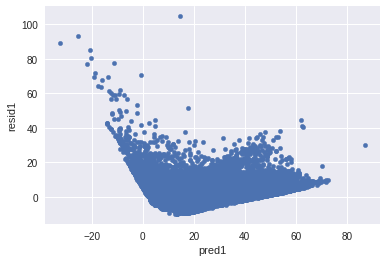

In [0]:
datedk['pred1']=lm1.predict(datedk)
datedk['resid1']=lm1.resid
datedk.plot('pred1','resid1',kind='scatter')

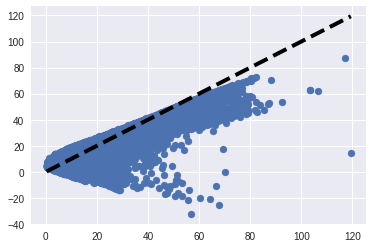

In [0]:
plt.scatter(datedk['acc_hand'], datedk['pred1'])
plt.plot([datedk['acc_hand'].min(), datedk['acc_hand'].max()], [datedk['acc_hand'].min(), datedk['acc_hand'].max()], 'k--', lw=4)
plt.show()

In [0]:
datedk['pred1']=lm1.predict(datedk)
datedk['resid1']=lm1.resid
datedk.plot('pred1','resid1',kind='scatter')

### 3.9 Model optimization 

In [0]:
myss=''

for nam in datedk.columns[2:3]:
  myss=myss+'+'+nam
for nam in datedk.columns[4:10]:
  myss=myss+'+'+nam
for nam in datedk.columns[11:16]:
  myss=myss+'+'+nam
# for nam in datedk.columns[12:16]:
#     myss=myss+'+'+nam

In [0]:
myss

'+heart_rate+IMU_hand2_ACC16+IMU_hand3_ACC16+IMU_hand4_AAC16+IMU_hand5_ACC6+IMU_hand6_ACC6+IMU_hand7_ACC6+IMU_hand9_G+IMU_hand10_G+IMU_hand11_M+IMU_hand12_M+IMU_hand13_M'

In [0]:
datedk['resid_t']=(datedk['resid1']-datedk['resid1'].mean())/datedk['resid1'].std()

datedkk=datedk[abs(datedk['resid_t'])>3].copy()

In [0]:
lm1=ols('acc_hand~'+ myss,data=datedkk).fit()
lm1_summary=lm1.summary()
print(lm1_summary)

                            OLS Regression Results                            
Dep. Variable:               acc_hand   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 1.824e+04
Date:                Mon, 07 Jan 2019   Prob (F-statistic):               0.00
Time:                        00:06:56   Log-Likelihood:                -19437.
No. Observations:                5960   AIC:                         3.888e+04
Df Residuals:                    5956   BIC:                         3.891e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          19.9048      0.111    1

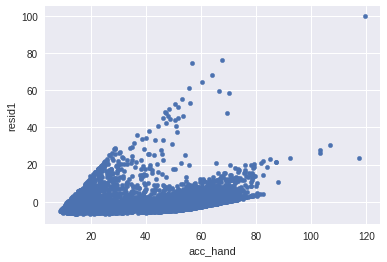

In [0]:
datedk['pred1']=lm1.predict(datedk)
datedk['resid1']=lm1.resid
datedk.plot('acc_hand','resid1',kind='scatter')

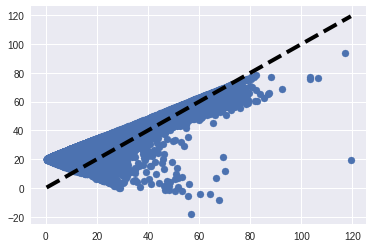

In [0]:
plt.scatter(datedk['acc_hand'], datedk['pred1'])
plt.plot([datedk['acc_hand'].min(), datedk['acc_hand'].max()], [datedk['acc_hand'].min(), datedk['acc_hand'].max()], 'k--', lw=4)
plt.show()

In [0]:
datedds

def cal_vol(data):
  acc_da=data['acc_hand'].values
  time_da=data['timestamp'].values
  speed=0
  vo=[]
  for acc in range (len(acc_da)-1):
    dis=speed+acc_da[acc]*(time_da[acc+1]-time_da[acc])
    vo.append(dis)
  return vo

### 3.10 Summary

### model text

In [0]:
# dat01=get_sample(datA,sampling="stratified", k=600, stratified_col=['activityID'])

In [0]:
datA=datAs[['IMU_chest1_C','activityID','mean_acc6_chest','mean_g_chest','mean_m_chest','mean_acc16_chest']]
dat02=datA.dropna()

In [0]:
dat02.shape

(406723, 6)

In [0]:
y=dat02[['activityID']]
x=dat02[['IMU_chest1_C','mean_acc6_chest','mean_g_chest','mean_m_chest','mean_acc16_chest']].dropna()
xa=x.astype(float)
xp=xa.abs()

In [0]:
corrmatrix=x.corr(method='spearman')
corrmatrix_new=corrmatrix[np.abs(corrmatrix)>0.5]

In [0]:
#共线性
corrmatrix_new

In [0]:
print(dat02.isnull().any()) 

In [0]:
dat02['bins']=pd.qcut(dat02.mean_acc6_chest,5)


## 6.In conclusion

## BP

In [0]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
scaler = MinMaxScaler()
scaler.fit(train_data)
#train_data,test_data,train_target,test_target
scaled_train_data = scaler.transform(train_data)
scaled_test_data=scaler.transform(test_data)

In [0]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(10,),activation='logistic',alpha=0.1,max_iter=1000)
mlp.fit(scaled_train_data,train_target)
mlp

In [0]:
from sklearn.neural_network import MLPClassifier
param_grid = {
    'hidden_layer_sizes':[(10, ), (5, 5)],
    'activation':['relu'], 
    'alpha':[0.05]
}
mlp = MLPClassifier(max_iter=1000)
gcv = GridSearchCV(estimator=mlp, param_grid=param_grid, 
                    cv=4, n_jobs=-1)
gcv.fit(scaled_train_data, train_target)

In [0]:
sgd = MLPClassifier(solver='sgd', activation='relu', alpha=1e-4, hidden_layer_sizes=(50, 50), random_state=1, max_iter=1000, verbose=10, learning_rate_init=0.1)
sgd.fit(scaled_train_data, train_target)

Iteration 1, loss = 1.66679910
Iteration 2, loss = 1.05833429
Iteration 3, loss = 0.92844762
Iteration 4, loss = 0.84797791
Iteration 5, loss = 0.78408181
Iteration 6, loss = 0.74222789
Iteration 7, loss = 0.70454771
Iteration 8, loss = 0.69206795
Iteration 9, loss = 0.66027403
Iteration 10, loss = 0.66923649
Iteration 11, loss = 0.63743902
Iteration 12, loss = 0.61618380
Iteration 13, loss = 0.61443303
Iteration 14, loss = 0.62943875
Iteration 15, loss = 0.59711272
Iteration 16, loss = 0.57669659
Iteration 17, loss = 0.58334882
Iteration 18, loss = 0.55986697
Iteration 19, loss = 0.56541053
Iteration 20, loss = 0.53938042
Iteration 21, loss = 0.55371069
Iteration 22, loss = 0.53988520
Iteration 23, loss = 0.53866674
Iteration 24, loss = 0.53650858
Iteration 25, loss = 0.53943878
Iteration 26, loss = 0.51986979
Iteration 27, loss = 0.50800114
Iteration 28, loss = 0.51116618
Iteration 29, loss = 0.51447891
Iteration 30, loss = 0.50891376
Iteration 31, loss = 0.50430137
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.1, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=10, warm_start=False)

In [0]:
sgd_predict = sgd.predict(scaled_test_data)

In [0]:
print(sgd.score(scaled_test_data, test_target))

0.8184957213631587


In [0]:
sgd_predict

array(['other', 'ironing', 'vacuum cleaning', ..., 'cycling', 'other',
       'vacuum cleaning'], dtype='<U17')

In [0]:
print(classification_report(test_target, sgd_predict))

                   precision    recall  f1-score   support

   Nordic walking       0.86      0.84      0.85      1270
 ascending stairs       0.77      0.49      0.60       758
          cycling       1.00      0.95      0.98      1079
descending stairs       0.73      0.79      0.76       655
          ironing       0.84      0.94      0.89      1344
            lying       0.99      0.92      0.95      1079
            other       0.77      0.87      0.82      8272
     rope jumping       0.98      0.14      0.24       600
          running       0.55      0.42      0.47       425
          sitting       0.95      0.94      0.95       987
         standing       0.81      0.97      0.88      1173
  vacuum cleaning       0.77      0.84      0.81       908
          walking       1.00      0.54      0.70      1433

        micro avg       0.82      0.82      0.82     19983
        macro avg       0.85      0.74      0.76     19983
     weighted avg       0.83      0.82      0.81     1

In [0]:
predict_y = gcv.predict(data)
print(classification_report(target, predict_y))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                   precision    recall  f1-score   support

   Nordic walking       0.00      0.00      0.00      3232
 ascending stairs       0.00      0.00      0.00      1933
          cycling       0.00      0.00      0.00      2739
descending stairs       0.00      0.00      0.00      1674
          ironing       0.00      0.00      0.00      3301
            lying       0.00      0.00      0.00      2655
            other       0.42      0.98      0.59     20708
     rope jumping       0.00      0.00      0.00      1532
          running       0.00      0.00      0.00      1030
          sitting       0.00      0.00      0.00      2403
         standing       0.00      0.00      0.00      2875
  vacuum cleaning       0.10      0.08      0.09      2292
          walking       0.00      0.00      0.00      3582

        micro avg       0.41      0.41      0.41     49956
        macro avg       0.04      0.08      0.05     49956
     weighted avg       0.18      0.41      0.25     4

In [0]:
gcv

In [0]:
# 查看模型预测结果
train_est = clf.predict(train_data)  #  用模型预测训练集的结果
train_est_p=clf.predict_proba(train_data)[:,1]  #用模型预测训练集的概率
test_est=clf.predict(test_data)  #  用模型预测测试集的结果
test_est_p=clf.predict_proba(test_data)[:,1]  #  用模型预测测试集的概率
pd.DataFrame({'test_target':test_target,'test_est':test_est,'test_est_p':test_est_p}).T

In [0]:
fpr_test, tpr_test, th_test = metrics.roc_curve(test_target, test_est_p)
fpr_train, tpr_train, th_train = metrics.roc_curve(train_target, train_est_p)
plt.figure(figsize=[6,6])
plt.plot(fpr_test, tpr_test)
plt.plot(fpr_train, tpr_train)
plt.title('ROC curve')
plt.show()
#%%
print('AUC = %6.4f' %metrics.auc(fpr_test, tpr_test))